<font color="Crimson" size=6em>TensorFlow を利用した深層学習と配列処理</font>

教材作成者：東北大学大学院 情報科学研究科

#1. <font color="Crimson">はじめに</font>


##1-1. <font color="Crimson">このコンテンツで学ぶこと</font>

TenforFlow とは 深層学習を Python で利用するためのフレームワークです．現在世界で最も多くの人に利用されています．TensorFlow はひとつのフレームワークなのですが，コーディングをする際にいくつかの書き方があります．Keras の書き方，Sequential な書き方，Functional な書き方，Subclassing な書き方です．Keras の書き方はとても簡単にニューラルネットワークを実現します．しかし，拡張性が高くありません．Subclassing API は最も柔軟な書き方が可能です．習得は大して難しくありません（Keras から入った人がそういう主張をしているように思えます）．習得の難易度と，ニューラルネットワークに対する理解を得られる度合いや柔軟にネットワークを構築できる利点を天秤にかけたときに，Subclassing API を最初に学習した方が得られるものが多いと思い，これを紹介します．Subclassing API は PyTorch（元々は Chainer の書き方 = define by run）とほぼ同じ書き方です．このコンテンツは以下の3個の章からなります．


*   TensorFlow入門
*   深層学習入門
*   配列情報の処理

最初の章で TensorFlow の基本的な操作方法を NumPy と比較しながら紹介し，次の章では深層学習の最も基本的なアルゴリズムである多層パーセプトロン（MLP）を実装します．最後の章では配列データ（文字列）を処理します．文章を人工知能に入力して，その文章の感情を positive か negative のふたつに分類する課題に取り組みます．



##1-2. <font color="Crimson">コンパニオン</font>

このコンテンツには，受講者の理解を助けるためのコンパニオンがいます．以下のものは「サミー先生」です．サミー先生は今回のこの教材の制作者ではないのですが分かり難いところを詳しく教えてくれます．

<font color="Crimson">(9｀･ω･)9 ｡oO(ちゃお！)</font>

#2. <font color="Crimson">TensorFlow 入門</font>

この章では TensorFlow の基本的な操作と，その操作を習得するために操作方法を知っておくと便利な NumPy という数値計算ライブラリの使い方を紹介します．

##2-1. <font color="Crimson">基本操作</font>

###2-1-1. <font color="Crimson">インポート</font>

NumPy と同じように TensorFlow をインポートします．

In [1]:
#!/usr/bin/env python3
import tensorflow as tf
 
def main():
    pass
    # TensorFlow のバージョンを出力．
 
if __name__ == "__main__":
    main()

###2-1-2. <font color="Crimson">テンソル</font>

TensorFlow では「テンソル」と呼ばれる NumPy の多次元配列に類似したデータ構造を用います．2行目で TensorFlow をインポートします．5行目のテンソルを生成するためのコマンドは `tf.zeros()` で，これによって，全要素が `0` であるテンソルが生成されます．最初の引数には生成されるテンソルの次元数を指定します．また，データのタイプを指定することができますが以下の場合は32ビットのフロートの値を生成しています．

In [ ]:
#!/usr/bin/env python3
import tensorflow as tf

def main():
    tx = tf.zeros([3, 3], dtype=tf.float32)
    print(tx)
    # 1階テンソルを生成．
    # 3階テンソルを生成．

if __name__ == "__main__":
    main()

以下のようにすると，整数を生成できます．

In [ ]:
#!/usr/bin/env python3
import tensorflow as tf

def main():
    tx = tf.zeros([3, 3], dtype=tf.int32) # ここが整数を生成するための記述
    print(tx)
    # 1階テンソルを生成．
    # 3階テンソルを生成．

if __name__ == "__main__":
    main()

データのタイプを確認したい場合とテンソルのシェイプを確認したい場合は以下のようにします．

In [ ]:
#!/usr/bin/env python3
import tensorflow as tf

def main():
    tx = tf.zeros([4, 3], dtype=tf.int32)
    print(tx.dtype)
    print(tx.shape)
    # 浮動小数点数の2行2列の行列を生成して型と形を確認．

if __name__ == "__main__":
    main()

一様分布に従う乱数を生成したい場合には以下のようにします．一様分布の母数（パラメータ）は最小値と最大値です．ここでは，最小値が-1で最大値が1の一様分布 $U(-1,1)$ に従う乱数を生成します．

In [ ]:
#!/usr/bin/env python3
import tensorflow as tf

def main():
    tx = tf.random.uniform([4, 3], minval=-1, maxval=1, dtype=tf.float32)
    print(tx)
    # 何度か実行して値が異なることを確認．

if __name__ == "__main__":
    main()

上のコードセルを何度か繰り返し実行すると一様分布に従う4行3列のテンソルの値が生成されますが，1回ごとに異なる値が出力されているはずです．これは計算機実験をする際にとても厄介です．再現性が取れないからです．これを防ぐために「乱数の種」というものを設定します．以下のコードの3行目のような指定を追加します．ここでは，0という値を乱数の種に設定していますが，これはなんでも好きな値を設定して良いです．<font color="Crimson">普通，科学的な計算機実験をする際に乱数の種を固定せずに計算を開始することはあり得ません．乱数を使う場合は常に乱数の種を固定しておくことを習慣づける必要があります．</font>

In [ ]:
#!/usr/bin/env python3
import tensorflow as tf
tf.random.set_seed(0)

def main():
    tx = tf.random.uniform([4, 3], minval=-1, maxval=1, dtype=tf.float32)
    print(tx)
    # 何度か繰り返して実行．
    # 全く同じコマンドで別の変数を生成して出力．
    # 何度か繰り返して実行．
    # 乱数のタネを別の値に変更した後に何度か繰り返して実行．

if __name__ == "__main__":
    main()

Python 配列より変換することもできます．この `tf.constant()` は実際には使う機会は多くありません．

In [ ]:
#!/usr/bin/env python3
import tensorflow as tf
 
def main():
    tx = tf.constant([2, 4], dtype=tf.float32)
    print(tx)
    # 多次元 Python 配列をテンソルに変換．

if __name__ == "__main__":
    main()

なぜなら，TensorFlow のテンソル（tf.Tensor）と NumPy の多次元配列（ndarray）の変換は以下のふたつのルールによる簡単な変換を TensorFlow が自動で行ってくれるからです．


1.   TensorFlowの演算により NumPy の ndarray は自動的に tf.Tensor に変換される．
2.   NumPy の演算により tf.Tensor は自動的に ndarray に変換される．

これに関しては以下の四則計算のところでその挙動を確認します．



###2-1-3. <font color="Crimson">四則計算</font>

テンソルの四則計算は以下のように行います．最初に足し算を行います．NumPy と同じようにやはり element-wise な計算です．実行結果は `tf.Tensor([3 7], shape=(2,), dtype=int32)` となっており，配列の計算の結果が tf.Tensor に変換されていることが確認できます．

In [ ]:
#!/usr/bin/env python3
import tensorflow as tf
 
def main():
    tx = tf.add([2, 4], [1, 3])
    print(tx)
    # 別の計算を実行．

if __name__ == "__main__":
    main()

以下では，ふたつの NumPy 多次元配列を生成しそれらを足し合わせます．得られる結果は NumPy の多次元配列でなくて tf.Tensor であることが確認できます．

In [ ]:
#!/usr/bin/env python3
import numpy as np
import tensorflow as tf
 
def main():
    na = np.array([[1, 2], [1, 3]])
    nb = np.array([[2, 3], [4, 5]])
    tx = tf.add(na, nb)
    print(tx)
    # 別の計算を実行．

if __name__ == "__main__":
    main()

その他の四則演算は以下のように行います．

In [ ]:
#!/usr/bin/env python3
import numpy as np
import tensorflow as tf
 
def main():
    na = np.array([[1, 2], [1, 3]], dtype=np.float32)
    nb = np.array([[2, 3], [5, 6]], dtype=np.float32)
    print(tf.add(na, nb))
    print(tf.subtract(nb, na))
    print(tf.multiply(na, nb))
    print(tf.divide(nb, na))
    # 別の計算を実行．

if __name__ == "__main__":
    main()

<font color="Crimson">(9｀･ω･)9 ｡oO(上から足し算，引き算，掛け算，割り算です．)</font>

上の `tf.multiply()` はテンソルの要素ごとの積（アダマール積）を計算するための方法です．行列の積は以下のように `tf.matmul()` を利用します．

In [ ]:
#!/usr/bin/env python3
import numpy as np
import tensorflow as tf
 
def main():
    na = np.array([[1, 2], [1, 3]], dtype=np.float32)
    nb = np.array([[2, 3], [5, 6]], dtype=np.float32)
    print(tf.matmul(na, nb))
    # tf.multiply() との違いを確認．

if __name__ == "__main__":
    main()

テンソルもブロードキャストしてくれます．以下のようなテンソルとスカラの計算も良い感じで解釈して実行してくれます．

In [ ]:
#!/usr/bin/env python3
import numpy as np
import tensorflow as tf
 
def main():
    na = np.array([[1, 2], [1, 3]], dtype=np.float32)
    print(tf.add(na, 1))
    # 引き算を実行．

if __name__ == "__main__":
    main()

以下のように `+` や `-` を使って記述することも可能です．

In [ ]:
#!/usr/bin/env python3
import tensorflow as tf
 
def main():
    ta = tf.constant([2, 4], dtype=tf.float32)
    tb = tf.constant([5, 6], dtype=tf.float32)
    print(ta + tb)
    print(tb - ta)
    print(ta * tb)
    print(tb / ta)
    # "//" と "%" の挙動を確認．

if __name__ == "__main__":
    main()

二乗の計算やテンソルの要素の総和を求めるための便利な方法も用意されています．このような方法は状況に応じてその都度調べて使います．全部覚える必要はありません．

In [ ]:
#!/usr/bin/env python3
import numpy as np
import tensorflow as tf
 
def main():
    nx = np.array([1, 2, 3], dtype=np.float32)
    print(tf.square(nx))
    print(tf.reduce_sum(nx))
    # 多次元配列での挙動を確認．

if __name__ == "__main__":
    main()

###2-1-4. <font color="Crimson">特殊な操作</font>

以下のようなスライスの実装も NumPy と同じです．

In [ ]:
#!/usr/bin/env python3
import tensorflow as tf
 
def main():
    tx = tf.constant([[2, 4], [6, 8]], dtype=tf.float32)
    print(tx[:,0])
    # 2行目の値を出力．

if __name__ == "__main__":
    main()

<font color="Crimson">(9｀･ω･)9 ｡oO(これは2行2列の行列の1列目の値を取り出す操作です．)</font>

テンソルのサイズの変更には `tf.reshape()` を利用します．

In [ ]:
#!/usr/bin/env python3
import tensorflow as tf
 
def main():
    tx = tf.random.uniform([4, 5], dtype=tf.float32)
    print(tx)
    print(tf.reshape(tx, [20]))
    print(tf.reshape(tx, [1, 20]))
    print(tf.reshape(tx, [5, 4]))
    print(tf.reshape(tx, [-1, 4]))
    # tf.reshape(tx, [20, 1]) の形を確認．

if __name__ == "__main__":
    main()

以上のプログラムの6行目では4行5列の行列が生成されています．これを，20要素からなるベクトルに変換するのが7行目の記述です．また，8行目の記述では1行20列の行列を生成できます．また，9行目は5行4列の行列を生成するためのものです．同じく10行目も5行4列の行列を生成します．ここでは，`tf.reshape()` の shape を指定するオプションの最初の引数に `-1` が指定されていますが，これのように書くと自動でその値が推測されます．この場合，`5` であると推測されています．

###2-1-5. <font color="Crimson">変数の変換</font>

これまでに，NumPyの 多次元配列を TensorFlow のテンソルに変換する方法は確認しました．テンソルを NumPy 配列に変換するには明示的に `numpy()` を指定する方法があります．6行目は NumPy 配列を生成します．8行目はその NumPy 配列をテンソルに変換します．さらに，NumPy 配列に戻すためには10行目のように `.numpy()` を利用します．

In [ ]:
#!/usr/bin/env python3
import numpy as np
import tensorflow as tf

def main():
    na = np.ones(5)
    print("NumPy:", na)
    ta = tf.constant(na, dtype=tf.float32)
    print("Tensor:", ta)
    na = ta.numpy()
    print("NumPy:", na)
    # さらに32ビット整数型のテンソルに変換．

if __name__ == "__main__":
    main()

また，テンソルに対して NumPy の演算操作を行うと自動的にテンソルは NumPy 配列に変換されます．以下の8行目と9行目はどちらもベクトルの内積を計算していますが，8行目で得られる結果はテンソル，9行目で得られる結果は NumPy の値です．

In [ ]:
#!/usr/bin/env python3
import numpy as np
import tensorflow as tf

def main():
    ta = tf.constant([2, 4], dtype=tf.float32)
    tb = tf.constant([5, 6], dtype=tf.float32)
    print(tf.tensordot(ta, tb, axes=1))
    print(np.dot(ta, tb))
    # NumPy 配列とテンソルの内積をテンソルの演算方法で計算．

if __name__ == "__main__":
    main()

###2-1-6. <font color="Crimson">勾配の計算</font>

深層学習法におけるアルゴリズムの中身を分解すると行列の掛け算と微分から構成されていることがわかります．TensorFlow はこの行列の掛け算と微分を行うライブラリです．自動微分機能を提供します．ここでは勾配の計算を紹介するため，以下の式を考えます．

$y = x^2 + 2$

これに対して以下の偏微分を計算することができます．

$\dfrac{\partial y}{\partial x} = 2x$

よって $x=5$ のときの偏微分係数は以下のように計算できます．

$\left.\dfrac{\partial y}{\partial x}\right|_{x=5}=10$

これを TensorFlow で実装すると以下のように書けます．微分は10行目のように `tape.gradient()` によって行います．

In [ ]:
#!/usr/bin/env python3
import tensorflow as tf
 
def main():
    tx = tf.Variable(5, dtype=tf.float32)
    with tf.GradientTape() as tape:
        ty = tx**2 + 2 # ここに勾配を求める対象の計算式を書く．
    grad = tape.gradient(ty, tx)
    print(grad)
    # y=3x^2+x+1をxで偏微分したときの，x=1の値を計算．

if __name__ == "__main__":
    main()

上の程度の微分だとこの自動微分機能はさほど有難くないかもしれませんが，以下のような計算となると，そこそこ有難くなってきます．以下では，(1, 2) の行列 `ts` と (2, 2) の行列 `tt` と (2, 1) の行列 `tu` を順に掛けることで，最終的に (1, 1) の行列の値，スカラー値を得ますが，それを `tt` で微分した値を計算しています（`tt` で偏微分したので得られる行列のシェイプは `tt` と同じ）．

In [ ]:
#!/usr/bin/env python3
import tensorflow as tf

def main():
    # Definition
    ts = tf.constant([[2, 1]], dtype=tf.float32)
    tt = tf.Variable([[2, 4], [6, 8]], dtype=tf.float32) # これが変数．
    tu = tf.constant([[4], [1]], dtype=tf.float32)
    # Calculation
    with tf.GradientTape() as tape:
        tz = tf.matmul(tf.matmul(ts, tt), tu)
    grad = tape.gradient(tz,tt)
    print(grad)
    # 2行2列の定数行列taを生成，ts*ta*tt*tuの行列の積を計算し，ttで偏微分．

if __name__ == "__main__":
    main()

これは以下のような計算をしています．`tf.Variable()` で定義される行列は以下です：

$
  t = \left[
    \begin{array}{cc}
      v & w \\
      x & y \\
    \end{array}
  \right]
$．

また，`tf.constant()` で定義される行列は以下です：

$s = \left[
    \begin{array}{cc}
      2 & 1 \\
    \end{array}
  \right]
$，

$u = \left[
    \begin{array}{c}
      4 \\
      1
    \end{array}
  \right]
$．

これに対して11行目の計算で得られる値は以下です：

$z(v,w,x,y) = 8v+2w+4x+y$．

よってこれらを偏微分して，それぞれの変数がプログラム中で定義される値のときの値は以下のように計算されます：

$\left.\dfrac{\partial z}{\partial v}\right|_{(v,w,x,y)=(2,4,6,8)}=8$，

$\left.\dfrac{\partial z}{\partial w}\right|_{(v,w,x,y)=(2,4,6,8)}=2$，

$\left.\dfrac{\partial z}{\partial x}\right|_{(v,w,x,y)=(2,4,6,8)}=4$，

$\left.\dfrac{\partial z}{\partial y}\right|_{(v,w,x,y)=(2,4,6,8)}=1$．

<font color="Crimson">(9｀･ω･)9 ｡oO(これにコスト関数と活性化関数付けて最急降下法やったらニューラルネットワークです．自動微分すごい．)</font>

なぜ微分を求めたいかというと，勾配法（深層学習の場合，普通，最急降下法）でパラメータをアップデートしたいからです．以下では最急降下法を実装してみます．最急降下法は関数の最適化法です．ある関数に対して極小値（極大値）を計算するためのものです．以下のような手順で計算が進みます．


1.   初期パラメータ（$\theta_0$）をランダムに生成します．
2.   もしパラメータ（$\theta_t$）が最適値または，最適値に近いなら計算をやめます．ここで，$t$ は以下の繰り返しにおける $t$ 番目のパラメータです．
3.   パラメータを以下の式によって更新し，かつ，$t$ の値を $1$ だけ増やします．ここで，$\alpha$ は学習率と呼ばれる更新の大きさを決める値で，$g_t$ は $t$ のときの目的の関数の勾配です．<br>
    $\theta_{t+1}=\theta_t-\alpha g_t$
4.   ステップ2と3を繰り返します．


ここでは以下の関数を考えます．

$y=(x+1)^2+2$

初期パラメータを以下のように決めます（実際にはランダムに決める）．

$x_0=1.6$

この関数の極小値を見つけたいのです．これは解析的に解くのはとても簡単で，括弧の中が0になる値，すなわち $x$ が $-1$ のとき，極小値 $y=2$ です．

最急降下法で解くと，以下の図のようになります．最急降下法は解析的に解くことが難しい問題を正解の方向へ少しずつ反復的に動かしていく方法です．

<img src="https://drive.google.com/uc?id=1bRRIwEJy-ltIHnzfqOpOVVlZYXrT3PXR" width="70%">

これを TensorFlow を用いて実装すると以下のようになります．出力中，`Objective` は目的関数の値，`Solution` はその時点での解です．最終的に $x=-0.9968\simeq-1$ のとき，最適値 $y=2$ が出力されています．

In [ ]:
#!/usr/bin/env python3
import tensorflow as tf
 
def main():
    tx = tf.Variable(1.6, dtype=tf.float32) # これが変数．
    epoch, update_value, lr = 1, 5, 0.1 # 更新値はダミー変数．
    while abs(update_value) > 0.001:
        with tf.GradientTape() as tape:
            ty = (tx + 1)**2 + 2
        grad = tape.gradient(ty, tx)
        update_value = lr * grad.numpy()
        tx.assign(tx - update_value)
        print("Epoch {:4d}:\tObjective = {:5.3f}\tSolution = {:7.4f}".format(epoch, ty, tx.numpy()))
        epoch = epoch + 1
        # 下の新たなコードセルで計算．

if __name__ == "__main__":
    main()

5行目で最初のパラメータを発生させています．通常は乱数によってこの値を決めますが，ここでは上の図に合わせて1.6とします．次の6行目では，最初のエポック，更新値，学習率を定義します．エポックとは（ここでは）パラメータの更新回数のことを言います．7行目は終了条件です．以上のような凸関数においては勾配の値が0になる点が本当の最適値（正しくは停留点）ではありますが，計算機的にはパラメータを更新する値が大体0になったところで計算を打ち切ります．この場合，「大体0」を「0.001」としました．9行目は目的の関数，10行目で微分をしています．11行目は最急降下法で更新する値を計算しています．12行目の計算で `tx` をアップデートします．この12行目こそが上述の最急降下法の式です．

<font color="Crimson">(9｀･ω･)9 ｡oO(ここで最急降下法について説明しましたが，このような実装は TensorFlow を利用する際にする必要はありません．TensorFlow はこのような計算をしてくれる方法を提供してくれています．よって，ここの部分の意味が解らなかったとしても以降の部分は理解できます．)</font>

#3. <font color="Crimson">深層学習入門</font>

##3-1. <font color="Crimson">扱うデータの紹介</font>

###3-1-1. <font color="Crimson">MNIST について</font>

このセクションでは深層学習法で用いられるアルゴリズムの中でも最も基本的なものである MLP の実装方法を学びますが，この MLP に処理させるデータセットとして，機械学習界隈で最も有名なデータセットである MNIST（Mixed National Institute of Standards and Technology database）を解析対象に用います．筆者の経験によると，日本人も外国人も今のところ会った人全員がこれのことは「エムニスト」と発音しています．MNIST は縦横28ピクセル，合計784ピクセルよりなる画像データです．画像には手書きの一桁の数字（0から9）が含まれています．公式ウェブサイトでは，学習データセット6万個とテストデータセット1万個，全部で7万個の画像からなるデータセットが無償で提供されています．

###3-1-2. <font color="Crimson">ダウンロードと可視化</font>

公式サイトよりダウンロードしてきても良いのですが，TensorFlow がダウンロードするためのユーティリティを準備してくれているため，それを用います．以下の `tf.keras.datasets.mnist.load_data()` を用いることで可能です．MNIST は合計7万インスタンスからなるデータセットです．5行目でふたつのタプルにデータをダウンロードしていますが，最初のタプルは学習データセット，次のタプルはテストデータセットのためのものです．

In [ ]:
#!/usr/bin/env python3
import tensorflow as tf

def main():
    (lilearnx, lilearnt), (litestx, litestt) = tf.keras.datasets.mnist.load_data()
    print("The number of instances in the learning dataset:", len(lilearnx), len(lilearnt))
    print("The number of instances in the test dataset:", len(litestx), len(litestt))
    print("The input vector of the first instance in the learning dataset:", lilearnx[0])
    print("Its shape:", lilearnx[0].shape)
    print("The target vector of the first instance in the learning datast:", lilearnt[0])
    # 2番目のインスタンスのインプットデータとターゲットデータを確認．

if __name__ == "__main__":
	main()

データを可視化します．可視化のために matplotlib というライブラリをインポートします．

In [ ]:
#!/usr/bin/env python3
import tensorflow as tf
import matplotlib.pyplot as plt

def main():
    (lilearnx, lilearnt), (litestx, litestt) = tf.keras.datasets.mnist.load_data()
    plt.imshow(lilearnx[0], cmap="gray")
    plt.text(1, 2.5, int(lilearnt[0]), fontsize=20, color="white")
    # 別のインプットデータを表示．

if __name__ == "__main__":
	main()

このデータセットがダウンロードされている場所は `~/.keras/datasets` です．以下のような BaSH のコマンドを打つことで確認することができます．

In [ ]:
! ls /root/.keras/datasets

MNIST はこのような縦が28ピクセル，横が28ピクセルからなる手書き文字が書かれた（描かれた）画像です（0から9までの値）．それに対して，その手書き文字が0から9のどれなのかという正解データが紐づいています．この画像データを MLP に読み込ませ，それがどの数字なのかを当てるという課題に取り組みます．

##3-2. <font color="Crimson">MLP の実装</font>

###3-2-1. <font color="Crimson">簡単な MLP の実装</font>

実際に MNIST を処理する MLP を実装する前に，とても簡単なデータを処理するための MLP を実装します．ここでは，以下のようなデータを利用します．これが学習セットです．ここでは MLP の実装の方法を紹介するだけなのでバリデーションセットもテストセットも使用しません．

入力ベクトル | ターゲットベクトル
:---: | :---:
[ 1.1, 2.2, 3.0, 4.0 ] | [ 0 ]
[ 2.0, 3.0, 4.0, 1.0 ] | [ 1 ]
[ 2.0, 2.0, 3.0, 4.0 ] | [ 2 ]

すなわち，`[1.1, 2.2, 3.0, 4.0]` が人工知能へ入力されたら，`0` というクラスを返し，`[2.0, 3.0, 4.0, 1.0]` というベクトルが入力されたら `1` というクラスを返し，`[2.0, 2.0, 3.0, 4.0]` というベクトルが入力されたら `2` というクラスを返す人工知能を MLP で構築します．実際には以下のように書きます．

In [1]:
#!/usr/bin/env python3
import tensorflow as tf
tf.random.set_seed(0)
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
import numpy as np

def main():
    # データセットの生成
    tx=[[1.1,2.2,3.0,4.0],[2.0,3.0,4.0,1.0],[2.0,2.0,3.0,4.0]]
    tx=np.asarray(tx,dtype=np.float32)
    tt=[0,1,2]
    tt=tf.convert_to_tensor(tt)
    
    # ネットワークの定義
    model=Network()
    cce=tf.keras.losses.SparseCategoricalCrossentropy() #これでロス関数を生成する．
    acc=tf.keras.metrics.SparseCategoricalAccuracy()
    optimizer=tf.keras.optimizers.Adam() #これでオプティマイザを生成する．
    
    # 学習1回の記述
    @tf.function
    def inference(tx,tt):
        with tf.GradientTape() as tape:
            ty=model.call(tx)
            costvalue=cce(tt,ty) #正解と出力の順番はこの通りにする必要がある．
        gradient=tape.gradient(costvalue,model.trainable_variables)
        optimizer.apply_gradients(zip(gradient,model.trainable_variables))
        accvalue=acc(tt,ty)
        return costvalue,accvalue
    
    # 学習ループ
    for epoch in range(1,3000+1): # 学習の回数の上限値
        traincost,trainacc=inference(tx,tt)
        if epoch%100==0:
            print("Epoch {:5d}: Training cost= {:.4f}, Training ACC= {:.4f}".format(epoch,traincost,trainacc))
    
    # 学習が本当にうまくいったのか入力ベクトルのひとつを処理させてみる
    tx1=np.asarray([[1.1,2.2,3.0,4.0]],dtype=np.float32)
    ty1=model.call(tx1)
    print(ty1)

    # 未知のデータを読ませてみる
    tu=np.asarray([[999,888,777,666]],dtype=np.float32)
    tp=model.call(tu)
    print(tp)

    # Denseの最初の引数の値やエポックの値や変化させて，何が起こっているか把握する．

class Network(Model):
    def __init__(self):
        super(Network,self).__init__()
        self.d1=Dense(10, activation="relu") # これは全結合層を生成するための記述．
        self.d2=Dense(3, activation="softmax")
    
    def call(self,x):
        y=self.d1(x)
        y=self.d2(y)
        return y

if __name__ == "__main__":
    main()

Epoch   100: Training cost= 0.7544, Training ACC= 0.3567
Epoch   200: Training cost= 0.5563, Training ACC= 0.4200
Epoch   300: Training cost= 0.4919, Training ACC= 0.4744
Epoch   400: Training cost= 0.4345, Training ACC= 0.5650
Epoch   500: Training cost= 0.3746, Training ACC= 0.6520
Epoch   600: Training cost= 0.3109, Training ACC= 0.7100
Epoch   700: Training cost= 0.2477, Training ACC= 0.7514
Epoch   800: Training cost= 0.1913, Training ACC= 0.7825
Epoch   900: Training cost= 0.1456, Training ACC= 0.8067
Epoch  1000: Training cost= 0.1110, Training ACC= 0.8260
Epoch  1100: Training cost= 0.0855, Training ACC= 0.8418
Epoch  1200: Training cost= 0.0668, Training ACC= 0.8550
Epoch  1300: Training cost= 0.0531, Training ACC= 0.8662
Epoch  1400: Training cost= 0.0428, Training ACC= 0.8757
Epoch  1500: Training cost= 0.0352, Training ACC= 0.8840
Epoch  1600: Training cost= 0.0293, Training ACC= 0.8913
Epoch  1700: Training cost= 0.0246, Training ACC= 0.8976
Epoch  1800: Training cost= 0.0

上から説明を行います．以下のような記述があります．ここで，上述のデータを生成しています．`tx` は入力ベクトル3つです．`tt` はそれに対応するターゲットベクトル（スカラ）3つです．
```python
    tx=[[1.1,2.2,3.0,4.0],[2.0,3.0,4.0,1.0],[2.0,2.0,3.0,4.0]]
    tx=np.asarray(tx,dtype=np.float32)
    tt=[0,1,2]
    tt=tf.convert_to_tensor(tt)
```

次に，以下のような記述があります．この記述によって未学習の人工知能を生成します．生成した人工知能は `model` です．
```python
    model=Network()
```
この未学習の人工知能を生成するための記述の本体はプログラムの最下層辺りにある以下の記述です．
```python
class Network(Model):
    def __init__(self):
        super(Network,self).__init__()
        self.d1=Dense(10, activation="relu")
        self.d2=Dense(3, activation="softmax")
    
    def call(self,x):
        y=self.d1(x)
        y=self.d2(y)
        return y
```
ここに `Dense(10, activation="relu")` とありますが，これは10個のニューロンを持つ層を1個生成するための記述です．活性化関数に ReLU を使うようにしています．これによって生成される層の名前は `self.d1()` です．ここでは10個という値を設定していますが，これは100でも1万でも1兆でもなんでも良いです．解きたい課題にあわせて増やしたり減らしたりします．ここをうまく選ぶことでより良い人工知能を構築でき，腕の見せ所です．次に，`Dense(3, activation="softmax")` という記述で3個のニューロンを持つ層を1個生成します．この3個という値は意味を持っています．入力するデータのクラスが0，1または2の3分類（クラス）であるからです．また，活性化関数にはソフトマックス関数を指定しています．ソフトマックス関数の出力ベクトルの要素を合計すると1になります．各要素の最小値は0です．よって出力結果を確率として解釈できます．次の，`def call(self,x):` という記述はこれ（`class Network()`）によって生成した人工知能を呼び出したときにどのような計算をさせるかを定義するものです．入力として `x` というベクトルが与えられたら，それに対して最初の層を適用し，次に，その出力に対して次の層を適用し，その値を出力する，と定義しています．構築した人工知能 `model` に対して `model.call()` のような方法で呼び出すことができます．


次の以下の記述は，それぞれ，損失関数，正確度（ACC）を計算する関数，最急降下法の最適化法（パラメータの更新ルール）を定義するものです．これは，TensorFlow ではこのように書くのだと覚えるものです．
```python
    cce=tf.keras.losses.SparseCategoricalCrossentropy() #これでロス関数を生成する．
    acc=tf.keras.metrics.SparseCategoricalAccuracy()
    optimizer=tf.keras.optimizers.Adam() #これでオプティマイザを生成する．
```

次の以下の記述は損失を計算するためのものです．この `tf.GradientTapa()` は上でも出ました．最初に，`model.call()` に入力ベクトルのデータを処理させて出力ベクトル `ty` を得ます．この出力ベクトルとターゲットベクトルを損失関数の入力として損失 `traincost` を得ます．
```python
        with tf.GradientTape() as tape:
            ty=model.call(tx)
            costvalue=cce(tt,ty) #正解と出力の順番はこの通りにする必要がある．
```
この損失は人工知能が持つパラメータによって微分可能なので，以下の記述によって勾配を求めます．
```python
        gradient=tape.gradient(costvalue,model.trainable_variables)
```
以下の記述はパラメータ更新のための最急降下法の定義と損失とは別の性能評価指標である正確度（accuracy（ACC））を計算するための定義です．
```python
        optimizer.apply_gradients(zip(gradient,model.trainable_variables))
        accvalue=acc(tt,ty)
```
最後の以下の記述はこの関数の戻り値を定義するものです．
```python
        return costvalue,accvalue
```

次に記述されている以下の部分は，実際の学習のループに関するものです．このループでデータを何度も何度も予測器（人工知能）に読ませ，そのパラメータを成長させます．この場合，3000回データを学習させます．また，学習100回毎に学習の状況を出力させます．
```python
    for epoch in range(1,3000+1):
        traincost,trainacc=inference(tx,tt)
        if epoch%100==0:
            print("Epoch {:5d}: Training cost= {:.4f}, Training ACC= {:.4f}".format(epoch,traincost,trainacc))
```

次の記述，以下の部分では学習がうまくいったのかを確認するために学習データのひとつを学習済みの人工知能に読ませて予測をさせています．この場合，最初のデータのターゲットベクトルは0なので0が出力されなければなりません．
```python
    # 学習が本当にうまくいったのか入力ベクトルのひとつを処理させてみる
    tx1=np.asarray([[1.1,2.2,3.0,4.0]],dtype=np.float32)
    ty1=model.call(tx1)
    print(ty1)
```
出力結果は以下のようになっているはずです．出力はソフトマックス関数なので各クラスの確率が表示されています．これを確認すると，最初のクラス（0）である確率が99%以上であると出力されています．よって，やはり人工知能は意図した通り成長したことが確認できます．
```
tf.Tensor([[9.932116e-01 7.842198e-06 6.780579e-03]], shape=(1, 3), dtype=float32)
```


次に，全く新たなデータを入力しています．
```python
    # 未知のデータを読ませてみる
    tu=np.asarray([[999,888,777,666]],dtype=np.float32)
    tp=model.call(tu)
    print(tp)
```
`[999,888,777,666]` というベクトルを入力したときにどのような出力がされるかということですが，この場合，以下のような出力がされています．このベクトルを入力したときの予測値は2であるとこの人工知能は予測したということです．
```
tf.Tensor([[0. 0. 1.]], shape=(1, 3), dtype=float32)
```


以下では `Dense()` の挙動を確認してみます．`Dense()` はもちろんクラスの中でなければ使えない関数ではなく，`main()` の中でも呼び出して利用可能です．これで挙動を確認することでどのようにネットワークが構築されているか把握できるかもしれません．

In [ ]:
#!/usr/bin/env python3
import tensorflow as tf
tf.random.set_seed(0)
from tensorflow.keras.layers import Dense
import numpy as np

def main():
    # データセットの生成
    tx=[[1.1,2.2,3.0,4.0],[2.0,3.0,4.0,1.0],[2.0,2.0,3.0,4.0]]
    tx=np.asarray(tx,dtype=np.float32)
    
    # 関数を定義
    d1=Dense(10, activation="relu")

    # データセットの最初の値を入力
    print("1-----------")
    print(d1(tx[0:1]))

    # データセットの全部の値を入力
    print("2-----------")
    print(d1(tx))

    # 活性化関数を変更した関数を定義
    d1=Dense(10, activation="linear")

    # データセットの最初の値を入力
    print("3-----------")
    print(d1(tx[0:1]))

    # データセットの全部の値を入力
    print("4-----------")
    print(d1(tx))

    # 最初の引数の値を変更した関数を定義
    d1=Dense(4, activation="linear")

    # データセットの最初の値を入力
    print("5-----------")
    print(d1(tx[0:1]))

    # データセットの全部の値を入力
    print("6-----------")
    print(d1(tx))

    # 別の関数を定義
    d1=Dense(4, activation="linear")
    d2=Dense(5, activation="relu")

    # データセットの最初の値を入力
    print("7-----------")
    y=d1(tx[0:1])
    print(d2(y))

    # データセットの全部の値を入力
    print("8-----------")
    y=d1(tx)
    print(d2(y))

if __name__ == "__main__":
    main()

###3-2-2. <font color="Crimson">MNIST の基本処理</font>

次に，MNIST を処理して「0から9の数字が書かれた（描かれた）手書き文字を入力にして，その手書き文字が0から9のどれなのかを判別する人工知能」を構築します．以下のように書きます．

In [ ]:
#!/usr/bin/env python3
import tensorflow as tf
tf.random.set_seed(0)
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
import numpy as np

def main():
    # ハイパーパラメータの設定
    MAXEPOCH=50
    MINIBATCHSIZE=500
    UNITSIZE=500
    TRAINSIZE=54000
    MINIBATCHNUMBER=TRAINSIZE//MINIBATCHSIZE # ミニバッチのサイズとトレーニングデータのサイズから何個のミニバッチができるか計算

    # データの読み込み
    (lilearnx,lilearnt),(litestx,litestt)=tf.keras.datasets.mnist.load_data()
    outputsize=len(np.unique(lilearnt)) # MNISTにおいて出力ベクトルのサイズは0から9の10
    
    # 学習セットをトレーニングセットとバリデーションセットに分割（9:1）
    litrainx,litraint=lilearnx[:TRAINSIZE],lilearnt[:TRAINSIZE]
    livalidx,livalidt=lilearnx[TRAINSIZE:],lilearnt[TRAINSIZE:]
    
    # 最大値を1にしておく
    litrainx,livalidx,litestx=litrainx/255,livalidx/255,litestx/255
    
    # ネットワークの定義
    model=Network(UNITSIZE,outputsize)
    cce=tf.keras.losses.SparseCategoricalCrossentropy() #これでロス関数を生成する．
    acc=tf.keras.metrics.SparseCategoricalAccuracy() # これはテストの際に利用するため学習では利用しないが次のコードのために一応定義しておく．
    optimizer=tf.keras.optimizers.Adam() #これでオプティマイザを生成する．
    
    # 学習1回の記述
    @tf.function
    def inference(tx,tt,mode): # 「mode」という変数を新たに設定．これでパラメータ更新をするかしないかを制御する（バリデーションではパラメータ更新はしない）．
        with tf.GradientTape() as tape:
            model.trainable=mode
            ty=model.call(tx)
            costvalue=cce(tt,ty)
        gradient=tape.gradient(costvalue,model.trainable_variables)
        optimizer.apply_gradients(zip(gradient,model.trainable_variables))
        accvalue=acc(tt,ty)
        return costvalue,accvalue
    
    # 学習ループ
    for epoch in range(1,MAXEPOCH+1):
        # トレーニング
        index=np.random.permutation(TRAINSIZE)
        traincost=0
        for subepoch in range(MINIBATCHNUMBER): # 「subepoch」は「epoch in epoch」と呼ばれるのを見たことがある．
            somb=subepoch*MINIBATCHSIZE # 「start of minibatch」
            eomb=somb+MINIBATCHSIZE # 「end of minibatch」
            subtraincost,_=inference(litrainx[index[somb:eomb]],litraint[index[somb:eomb]],True)
            traincost+=subtraincost
        traincost=traincost/MINIBATCHNUMBER
        # バリデーション
        validcost,_=inference(livalidx,livalidt,False)
        # 学習過程の出力
        print("Epoch {:4d}: Training cost= {:7.4f} Validation cost= {:7.4f}".format(epoch,traincost,validcost))

    # ユニットサイズやミニバッチサイズを変更したり層を追加したりして挙動を把握する．

class Network(Model):
    def __init__(self,UNITSIZE,OUTPUTSIZE):
        super(Network,self).__init__()
        self.d0=Flatten(input_shape=(28,28)) # 行列をベクトルに変換
        self.d1=Dense(UNITSIZE, activation="relu")
        self.d2=Dense(OUTPUTSIZE, activation="softmax")
    
    def call(self,x):
        y=self.d0(x)
        y=self.d1(y)
        y=self.d2(y)
        return y

if __name__ == "__main__":
    main()

プログラムの中身について上から順に説明します．以下の部分はハイパーパラメータを設定する記述です．`MAXEPOCH` は計算させる最大エポックです．このエポックに至るまで繰り返しの学習をさせるということです．`MINIBATCHSIZE` とはミニバッチ処理でサンプリングするデータのサイズです．これが大きいとき実計算時間は短縮されます．この値が `1` のとき，学習法はオンライン学習法であり，この値がトレーニングセットのサイズと等しいとき，学習法は一括更新法です．ミニバッチの大きさは持っているマシンのスペックと相談しつつ，色々な値を試してみて一番良い値をトライアンドエラーで探します．`UNITSIZE` は MLP の層のサイズ，つまり，ニューロンの数です．`TRAINSIZE` はトレーニングセットのインスタンスの大きさです．MNIST の学習セットは60000インスタンスからなるのでその90%をトレーニングセットとして利用することにしています．`MINIBATCHNUMBER` はミニバッチのサイズとデータのサイズから計算されるミニバッチの個数です．オンライン学習法の場合，1エポックでパラメータ更新は，この例の場合，54000回行われます．一括更新法の場合，1エポックでパラメータ更新は1回行われます．このミニバッチのサイズ（500）とデータサイズの場合，1エポックでパラメータ更新は108回行われます．

```python
    # ハイパーパラメータの設定
    MAXEPOCH=50
    MINIBATCHSIZE=500
    UNITSIZE=500
    TRAINSIZE=54000
    MINIBATCHNUMBER=TRAINSIZE//MINIBATCHSIZE # ミニバッチのサイズとトレーニングデータのサイズから何個のミニバッチができるか計算
```

データの読み込みは上で説明したため省略し，以下の部分では読み込んだデータをトレーニングセットとバリデーションセットに分割しています．この `:` の利用方法は NumPy の使い方解説のところで行った通りです．
```python
    # 学習セットをトレーニングセットとバリデーションセットに分割（9:1）
    litrainx,litraint=lilearnx[:TRAINSIZE],lilearnt[:TRAINSIZE]
    livalidx,livalidt=lilearnx[TRAINSIZE:],lilearnt[TRAINSIZE:]
```

以下の記述では，MNIST に含まれる値を0以上1以下の値に変換しています（元々の MNIST は0から255の値で構成されています）．用いるオプティマイザの種類やそのパラメータ更新を大きさを決めるハイパーパラメータ（学習率）の設定によってはこのような操作が良い効果をもたらす場合があります．
```python
    # 最大値を1にしておく
    litrainx,livalidx,litestx=litrainx/255,livalidx/255,litestx/255
```

ネットワークの定義は以下で行います．これは前述の例と同じです．
```python
    # ネットワークの定義
    model=Network(UNITSIZE,outputsize)
    cce=tf.keras.losses.SparseCategoricalCrossentropy() #これでロス関数を生成する．
    acc=tf.keras.metrics.SparseCategoricalAccuracy() # これはテストの際に利用するため学習では利用しないが次のコードのために一応定義しておく．
    optimizer=tf.keras.optimizers.Adam() #これでオプティマイザを生成する．
```
ネットワーク自体は以下の部分で定義されているのですが，前述の例と少し異なります．ここでは，28行28列の行列を784要素のベクトルに変換するための層 `self.d0` を定義しています．
```python
class Network(Model):
    def __init__(self,UNITSIZE,OUTPUTSIZE):
        super(Network,self).__init__()
        self.d0=Flatten(input_shape=(28,28)) # 行列をベクトルに変換
        self.d1=Dense(UNITSIZE, activation="relu")
        self.d2=Dense(OUTPUTSIZE, activation="softmax")
    
    def call(self,x):
        y=self.d0(x)
        y=self.d1(y)
        y=self.d2(y)
        return y
```

学習1回分の記述は前述の例と少し異なります．`mode` という変数を利用して，トレーニングの際にはパラメータ更新を行い，バリデーションの際にはパラメータ更新を行わないように制御します．その他は前述の例と同じです．
```python
    # 学習1回の記述
    @tf.function
    def inference(tx,tt,mode): # 「mode」という変数を新たに設定．これでパラメータ更新をするかしないかを制御する（バリデーションではパラメータ更新はしない）．
        with tf.GradientTape() as tape:
            model.trainable=mode
            ty=model.call(tx)
            costvalue=cce(tt,ty)
        gradient=tape.gradient(costvalue,model.trainable_variables)
        optimizer.apply_gradients(zip(gradient,model.trainable_variables))
        accvalue=acc(tt,ty)
        return costvalue,accvalue
```

学習ループが開始された最初の `index=np.random.permutation(TRAINSIZE)` ではトレーニングセットのサイズに応じた（この場合，0から53999）整数からなる要素をランダムに並べた配列を生成します．これを利用して，ミニバッチのときにランダムにインスタンスを抽出します．`traincost=0` のところではトレーニングコストを計算するための変数を宣言しています．ミニバッチ処理をするので，トレーニングコストはミニバッチの個数分，この場合108個分計算されるのですが，これを平均するために利用する変数です．この変数にミニバッチ処理1回毎に出力されるコストを足し合わせて，最後にミニバッチ処理の回数で割り平均値を出します．その次の `for subepoch in range(MINIBATCHNUMBER):` がミニバッチの処理です．この場合，最初に `somb` に入る値は `0`，`eomb` に入る値は `500` です．1番目から500番目までのデータを抽出する作業のためです．`index[somb:eomb]` には500個のランダムに抽出された整数が入っていますが，それを `litrainx[index[somb:eomb]]` のように使うことで，トレーニングセットからランダムに500個のインスタンスを抽出します．`traincost+=subtraincost` は1回のミニバッチ処理で計算されたコストを上で準備した変数に足し合わせる記述です．ミニバッチ処理が終了した後は，`traincost=traincost/MINIBATCHNUMBER` によって平均トレーニングコストを計算し，また，`validcost,_=inference(livalidx,livalidt,False)` によってバリデーションコストを計算し，それらの値をエポック毎に出力する記述をしています．
```python
    # 学習ループ
    for epoch in range(1,MAXEPOCH+1):
        # トレーニング
        index=np.random.permutation(TRAINSIZE)
        traincost=0
        for subepoch in range(MINIBATCHNUMBER): # 「subepoch」は「epoch in epoch」と呼ばれるのを見たことがある．
            somb=subepoch*MINIBATCHSIZE # 「start of minibatch」
            eomb=somb+MINIBATCHSIZE # 「end of minibatch」
            subtraincost,_=inference(litrainx[index[somb:eomb]],litraint[index[somb:eomb]],True)
            traincost+=subtraincost
        traincost=traincost/MINIBATCHNUMBER
        # バリデーション
        validcost,_=inference(livalidx,livalidt,False)
        # 学習過程の出力
        print("Epoch {:4d}: Training cost= {:7.4f} Validation cost= {:7.4f}".format(epoch,traincost,validcost))
```

次に，出力結果について説明します．このプログラムを実行するとエポックとその時のトレーニングコストとバリデーションコストが出力されます．
```
Epoch    1: Training cost=  0.4437 Validation cost=  0.1900
Epoch    2: Training cost=  0.1914 Validation cost=  0.1325
Epoch    3: Training cost=  0.1372 Validation cost=  0.1056
.
.
.
```
これは各エポックのときの人工知能の性能です．エポックが50のとき，トレーニングのコストはとても小さい値です．コストは小さければ小さいほど良いので，学習はしっかりされていることが確認されます．しかし，これはトレーニングデータに対する人工知能の性能です．もしかしたらトレーニングデータに対してのみ性能を発揮できる，トレーニングデータに過剰に適合してしまった人工知能である可能性があります．だから，そうなっていないかどうかを確認する別のデータ，つまり，バリデーションデータセットにおけるコストも確認する必要があります．エポックが50のときのバリデーションのコストはエポック20くらいのときのコストより大きくなっています．すなわち，この人工知能はトレーニングデータに過剰に適合しています．おそらくエポック20くらいの人工知能が最も良い人工知能であって，これを最終的なプロダクトとして選択する必要があります．次の操作ではこれを行います．

###3-2-3. <font color="Crimson">学習曲線の描画</font>

学習曲線とは横軸にエポック，縦軸にコストの値をプロットした図です．これを観察することで，どれくらいのエポックで学習が進み始めたか，人工知能の成長が止まったか，どのくらいのエポックで過剰適合が起きたか等を視覚的に理解することができます（慣れたら前述の結果のような数字を読むだけでこの図を想像できるようになるのだと思います）．

Epoch    1: Training cost=  0.4445 Validation cost=  0.1856
Epoch    2: Training cost=  0.1939 Validation cost=  0.1324
Epoch    3: Training cost=  0.1383 Validation cost=  0.1104
Epoch    4: Training cost=  0.1065 Validation cost=  0.0964
Epoch    5: Training cost=  0.0843 Validation cost=  0.0844
Epoch    6: Training cost=  0.0679 Validation cost=  0.0747
Epoch    7: Training cost=  0.0561 Validation cost=  0.0726
Epoch    8: Training cost=  0.0466 Validation cost=  0.0683
Epoch    9: Training cost=  0.0384 Validation cost=  0.0671
Epoch   10: Training cost=  0.0320 Validation cost=  0.0652
Epoch   11: Training cost=  0.0266 Validation cost=  0.0624
Epoch   12: Training cost=  0.0226 Validation cost=  0.0628
Epoch   13: Training cost=  0.0192 Validation cost=  0.0627
Epoch   14: Training cost=  0.0161 Validation cost=  0.0593
Epoch   15: Training cost=  0.0139 Validation cost=  0.0575
Epoch   16: Training cost=  0.0119 Validation cost=  0.0619
Epoch   17: Training cost=  0.0102 Valid

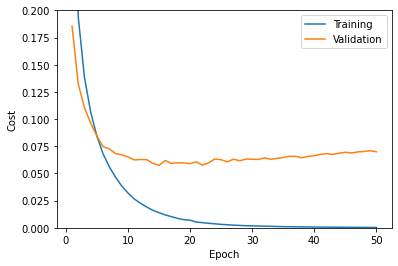

In [3]:
#!/usr/bin/env python3
import tensorflow as tf
tf.random.set_seed(0)
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
import numpy as np
import matplotlib.pyplot as plt

def main():
    # ハイパーパラメータの設定
    MAXEPOCH=50
    MINIBATCHSIZE=500
    UNITSIZE=500
    TRAINSIZE=54000
    MINIBATCHNUMBER=TRAINSIZE//MINIBATCHSIZE # ミニバッチのサイズとトレーニングデータのサイズから何個のミニバッチができるか計算

    # データの読み込み
    (lilearnx,lilearnt),(litestx,litestt)=tf.keras.datasets.mnist.load_data()
    outputsize=len(np.unique(lilearnt)) # MNISTにおいて出力ベクトルのサイズは0から9の10
    
    # 学習セットをトレーニングセットとバリデーションセットに分割（9:1）
    litrainx,litraint=lilearnx[:TRAINSIZE],lilearnt[:TRAINSIZE]
    livalidx,livalidt=lilearnx[TRAINSIZE:],lilearnt[TRAINSIZE:]
    
    # 最大値を1にしておく
    litrainx,livalidx,litestx=litrainx/255,livalidx/255,litestx/255
    
    # ネットワークの定義
    model=Network(UNITSIZE,outputsize)
    cce=tf.keras.losses.SparseCategoricalCrossentropy() #これでロス関数を生成する．
    acc=tf.keras.metrics.SparseCategoricalAccuracy() # これはテストの際に利用するため学習では利用しないが次のコードのために一応定義しておく．
    optimizer=tf.keras.optimizers.Adam() #これでオプティマイザを生成する．
    
    # 学習1回の記述
    @tf.function
    def inference(tx,tt,mode):
        with tf.GradientTape() as tape:
            model.trainable=mode
            ty=model.call(tx)
            costvalue=cce(tt,ty)
        gradient=tape.gradient(costvalue,model.trainable_variables)
        optimizer.apply_gradients(zip(gradient,model.trainable_variables))
        accvalue=acc(tt,ty)
        return costvalue,accvalue
    
    # 学習ループ
    liepoch,litraincost,livalidcost=[],[],[]
    for epoch in range(1,MAXEPOCH+1):
        # トレーニング
        index=np.random.permutation(TRAINSIZE)
        traincost=0
        for subepoch in range(MINIBATCHNUMBER): # 「subepoch」は「epoch in epoch」と呼ばれるのを見たことがある．
            somb=subepoch*MINIBATCHSIZE # 「start of minibatch」
            eomb=somb+MINIBATCHSIZE # 「end of minibatch」
            subtraincost,_=inference(litrainx[index[somb:eomb]],litraint[index[somb:eomb]],True)
            traincost+=subtraincost
        traincost=traincost/MINIBATCHNUMBER
        # バリデーション
        validcost,_=inference(livalidx,livalidt,False)
        # 学習過程の出力
        print("Epoch {:4d}: Training cost= {:7.4f} Validation cost= {:7.4f}".format(epoch,traincost,validcost))
        liepoch.append(epoch)
        litraincost.append(traincost)
        livalidcost.append(validcost)

    # 学習曲線の描画    
    plt.plot(liepoch,litraincost,label="Training")
    plt.plot(liepoch,livalidcost,label="Validation")
    plt.ylim(0,0.2)
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    plt.legend()
    plt.show()

    # 次に進む．

class Network(Model):
    def __init__(self,UNITSIZE,OUTPUTSIZE):
        super(Network,self).__init__()
        self.d0=Flatten(input_shape=(28,28)) # 行列をベクトルに変換
        self.d1=Dense(UNITSIZE, activation="relu")
        self.d2=Dense(OUTPUTSIZE, activation="softmax")
    
    def call(self,x):
        y=self.d0(x)
        y=self.d1(y)
        y=self.d2(y)
        return y

if __name__ == "__main__":
    main()

最初に，コードの変更部位について説明します．以下の部分を追加しました．これは描画に必要なライブラリである `matplotlib` を利用するための記述です．
```python
import matplotlib.pyplot as plt
```

次に，学習ループの記述ですが，以下のように最初に `liepoch`，`litraincost`，`livalidcost` という3つの空の配列を用意しました．その後ループの最後で，これらの配列に，それぞれ，エポックの値，トレーニングのコストおよびバリデーションのコストをエポックを進めるたびに追加しています．
```python
    # 学習ループ
    liepoch,litraincost,livalidcost=[],[],[]
    for epoch in range(1,MAXEPOCH+1):
        # トレーニング
        index=np.random.permutation(TRAINSIZE)
        traincost=0
        for subepoch in range(MINIBATCHNUMBER): # 「subepoch」は「epoch in epoch」と呼ばれるのを見たことがある．
            somb=subepoch*MINIBATCHSIZE # 「start of minibatch」
            eomb=somb+MINIBATCHSIZE # 「end of minibatch」
            subtraincost,_=inference(litrainx[index[somb:eomb]],litraint[index[somb:eomb]],True)
            traincost+=subtraincost
        traincost=traincost/MINIBATCHNUMBER
        # バリデーション
        validcost,_=inference(livalidx,livalidt,False)
        # 学習過程の出力
        print("Epoch {:4d}: Training cost= {:7.4f} Validation cost= {:7.4f}".format(epoch,traincost,validcost))
        liepoch.append(epoch)
        litraincost.append(traincost)
        livalidcost.append(validcost)
```

最後の以下の部分は学習曲線をプロットするためのコードです．
```python
    # 学習曲線の描画    
    plt.plot(liepoch,litraincost,label="Training")
    plt.plot(liepoch,livalidcost,label="Validation")
    plt.ylim(0,0.2)
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    plt.legend()
    plt.show()
```

結果を観ると，トレーニングセットにおけるコストの値はエポックを経るにつれて小さくなっていることがわかります．これは，人工知能が与えられたデータに適合していることを示しています．一方で，バリデーションセットにおけるコストの値は大体エポックが10と20の間くらいで下げ止まり，その後はコストが増加に転じています．このコストの増加，人工知能がこのデータセットに適合するのとは逆の方向に成長を始めたことを意味しています．この現象が起こった原因は，この人工知能がその成長に利用するデータセット（トレーニングデータセット）に（のみ）過剰に適合し，汎化性能を失ったことにあります．この曲線を観察する限り，エポックは大体10から20の間くらいに留めておいた方が良さそうです．このような画像を観て，大体20で学習を止める，みたいに決めても悪くはありませんが，もっと体系的な方法があるので次にその方法を紹介します．

###3-2-4. <font color="Crimson">早期終了</font>

学習の早期終了（early stopping）とは過学習を防ぐための方法です．ここでは，ペイシェンス（patience）を利用した早期終了を紹介します．この方法では最も良い値のバリデーションコストを記録し続けます．そして学習を続け，そのベストなバリデーションコストを $n$ 回連続で更新できなかった場合，そこで学習を打ち切ります．この $n$ がペイシェンスと呼ばれる値です．ペイシェンスには我慢とか忍耐とかそのような意味があります．コードは以下のように書きます．

Epoch    1: Training cost=  0.4417 Validation cost=  0.1815
Epoch    2: Training cost=  0.1908 Validation cost=  0.1354
Epoch    3: Training cost=  0.1369 Validation cost=  0.1066
Epoch    4: Training cost=  0.1047 Validation cost=  0.0897
Epoch    5: Training cost=  0.0819 Validation cost=  0.0827
Epoch    6: Training cost=  0.0669 Validation cost=  0.0759
Epoch    7: Training cost=  0.0545 Validation cost=  0.0721
Epoch    8: Training cost=  0.0463 Validation cost=  0.0670
Epoch    9: Training cost=  0.0392 Validation cost=  0.0645
Epoch   10: Training cost=  0.0321 Validation cost=  0.0677
Epoch   11: Training cost=  0.0277 Validation cost=  0.0627
Epoch   12: Training cost=  0.0232 Validation cost=  0.0623
Epoch   13: Training cost=  0.0205 Validation cost=  0.0606
Epoch   14: Training cost=  0.0166 Validation cost=  0.0619
Epoch   15: Training cost=  0.0141 Validation cost=  0.0624
Epoch   16: Training cost=  0.0127 Validation cost=  0.0586
Epoch   17: Training cost=  0.0100 Valid

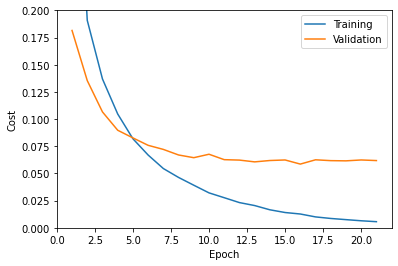

In [4]:
#!/usr/bin/env python3
import tensorflow as tf
tf.random.set_seed(0)
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
import numpy as np
import matplotlib.pyplot as plt

def main():
    # ハイパーパラメータの設定
    MAXEPOCH=50
    MINIBATCHSIZE=500
    UNITSIZE=500
    TRAINSIZE=54000
    MINIBATCHNUMBER=TRAINSIZE//MINIBATCHSIZE # ミニバッチのサイズとトレーニングデータのサイズから何個のミニバッチができるか計算
    PATIENCE=5

    # データの読み込み
    (lilearnx,lilearnt),(litestx,litestt)=tf.keras.datasets.mnist.load_data()
    outputsize=len(np.unique(lilearnt)) # MNISTにおいて出力ベクトルのサイズは0から9の10
    
    # 学習セットをトレーニングセットとバリデーションセットに分割（9:1）
    litrainx,litraint=lilearnx[:TRAINSIZE],lilearnt[:TRAINSIZE]
    livalidx,livalidt=lilearnx[TRAINSIZE:],lilearnt[TRAINSIZE:]
    
    # 最大値を1にしておく
    litrainx,livalidx,litestx=litrainx/255,livalidx/255,litestx/255
    
    # ネットワークの定義
    model=Network(UNITSIZE,outputsize)
    cce=tf.keras.losses.SparseCategoricalCrossentropy() #これでロス関数を生成する．
    acc=tf.keras.metrics.SparseCategoricalAccuracy() # これはテストの際に利用するため学習では利用しないが次のコードのために一応定義しておく．
    optimizer=tf.keras.optimizers.Adam() #これでオプティマイザを生成する．
    
    # 学習1回の記述
    @tf.function
    def inference(tx,tt,mode):
        with tf.GradientTape() as tape:
            model.trainable=mode
            ty=model.call(tx)
            costvalue=cce(tt,ty)
        gradient=tape.gradient(costvalue,model.trainable_variables)
        optimizer.apply_gradients(zip(gradient,model.trainable_variables))
        accvalue=acc(tt,ty)
        return costvalue,accvalue
    
    # 学習ループ
    liepoch,litraincost,livalidcost=[],[],[]
    patiencecounter,bestvalue=0,100000
    for epoch in range(1,MAXEPOCH+1):
        # トレーニング
        index=np.random.permutation(TRAINSIZE)
        traincost=0
        for subepoch in range(MINIBATCHNUMBER): # 「subepoch」は「epoch in epoch」と呼ばれるのを見たことがある．
            somb=subepoch*MINIBATCHSIZE # 「start of minibatch」
            eomb=somb+MINIBATCHSIZE # 「end of minibatch」
            subtraincost,_=inference(litrainx[index[somb:eomb]],litraint[index[somb:eomb]],True)
            traincost+=subtraincost
        traincost=traincost/MINIBATCHNUMBER
        # バリデーション
        validcost,_=inference(livalidx,livalidt,False)
        # 学習過程の出力
        print("Epoch {:4d}: Training cost= {:7.4f} Validation cost= {:7.4f}".format(epoch,traincost,validcost))
        liepoch.append(epoch)
        litraincost.append(traincost)
        livalidcost.append(validcost)
        if validcost<bestvalue:
            bestvalue=validcost
            patiencecounter=0
        else:
            patiencecounter+=1
        if patiencecounter==PATIENCE:
            break

    # 学習曲線の描画    
    plt.plot(liepoch,litraincost,label="Training")
    plt.plot(liepoch,livalidcost,label="Validation")
    plt.ylim(0,0.2)
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    plt.legend()
    plt.show()

    # 次に進む．

class Network(Model):
    def __init__(self,UNITSIZE,OUTPUTSIZE):
        super(Network,self).__init__()
        self.d0=Flatten(input_shape=(28,28)) # 行列をベクトルに変換
        self.d1=Dense(UNITSIZE, activation="relu")
        self.d2=Dense(OUTPUTSIZE, activation="softmax")
    
    def call(self,x):
        y=self.d0(x)
        y=self.d1(y)
        y=self.d2(y)
        return y

if __name__ == "__main__":
    main()

プログラムには以下の部分を追加しました．今回は4回までコストが改善しなくても許すが，5回目は許さないということです．
```python
    PATIENCE=5
```

学習ループを以下のようにコードを追加しました．`patiencecounter` はコストが更新されなかった回数を数えるカウンタです．`bestvalue` は最も良いコストの値を記録する変数です．
```python
    # 学習ループ
    liepoch,litraincost,livalidcost=[],[],[]
    patiencecounter,bestvalue=0,100000
    for epoch in range(1,MAXEPOCH+1):
        # トレーニング
        index=np.random.permutation(TRAINSIZE)
        traincost=0
        for subepoch in range(MINIBATCHNUMBER): # 「subepoch」は「epoch in epoch」と呼ばれるのを見たことがある．
            somb=subepoch*MINIBATCHSIZE # 「start of minibatch」
            eomb=somb+MINIBATCHSIZE # 「end of minibatch」
            subtraincost,_=inference(litrainx[index[somb:eomb]],litraint[index[somb:eomb]],True)
            traincost+=subtraincost
        traincost=traincost/MINIBATCHNUMBER
        # バリデーション
        validcost,_=inference(livalidx,livalidt,False)
        # 学習過程の出力
        print("Epoch {:4d}: Training cost= {:7.4f} Validation cost= {:7.4f}".format(epoch,traincost,validcost))
        liepoch.append(epoch)
        litraincost.append(traincost)
        livalidcost.append(validcost)
        if validcost<bestvalue:
            bestvalue=validcost
            patiencecounter=0
        else:
            patiencecounter+=1
        if patiencecounter==PATIENCE:
            break
```
以下の部分で，もし最も良いコストよりさらに良いコストが得られたらベストなコストを更新し，また，ペイシェンスのカウンタを元に（`0`）戻す作業をし，それ以外の場合はペイシェンスのカウンタを1ずつ増やします．もし，カウンタの値があらかじめ設定したペイシェンスの値に達したら学習ループを停止します．
```python
        if validcost<bestvalue:
            bestvalue=validcost
            patiencecounter=0
        else:
            patiencecounter+=1
        if patiencecounter==PATIENCE:
            break
```

結果を観ると，過学習が起こっていなさそうなところで学習が停止されているのが解ります．

###3-2-5. <font color="Crimson">モデルの保存と利用</font>

これまでに，早期終了を利用して良い人工知能が生成できるエポックが判明しました．機械学習の目的は当然，良い人工知能を開発することです．開発した人工知能は普通，別のサーバーとかトレーニングした時とは別の時間に利用したいはずです．ここで，この学習で発見した人工知能を保存して別のプログラムから，独立した人工知能として利用する方法を紹介します．最後に，テストセットでのその人工知能の性能を評価します．コードは以下のように変更します．

In [ ]:
#!/usr/bin/env python3
import tensorflow as tf
tf.random.set_seed(0)
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
import numpy as np
import matplotlib.pyplot as plt

def main():
    # ハイパーパラメータの設定
    MAXEPOCH=50
    MINIBATCHSIZE=500
    UNITSIZE=500
    TRAINSIZE=54000
    MINIBATCHNUMBER=TRAINSIZE//MINIBATCHSIZE # ミニバッチのサイズとトレーニングデータのサイズから何個のミニバッチができるか計算
    PATIENCE=5

    # データの読み込み
    (lilearnx,lilearnt),(litestx,litestt)=tf.keras.datasets.mnist.load_data()
    outputsize=len(np.unique(lilearnt)) # MNISTにおいて出力ベクトルのサイズは0から9の10
    
    # 学習セットをトレーニングセットとバリデーションセットに分割（9:1）
    litrainx,litraint=lilearnx[:TRAINSIZE],lilearnt[:TRAINSIZE]
    livalidx,livalidt=lilearnx[TRAINSIZE:],lilearnt[TRAINSIZE:]
    
    # 最大値を1にしておく
    litrainx,livalidx,litestx=litrainx/255,livalidx/255,litestx/255
    
    # ネットワークの定義
    model=Network(UNITSIZE,outputsize)
    cce=tf.keras.losses.SparseCategoricalCrossentropy() #これでロス関数を生成する．
    acc=tf.keras.metrics.SparseCategoricalAccuracy() # これはテストの際に利用するため学習では利用しないが次のコードのために一応定義しておく．
    optimizer=tf.keras.optimizers.Adam() #これでオプティマイザを生成する．
    # モデルを保存するための記述
    checkpoint=tf.train.Checkpoint(model=model)
    
    # 学習1回の記述
    @tf.function
    def inference(tx,tt,mode):
        with tf.GradientTape() as tape:
            model.trainable=mode
            ty=model.call(tx)
            costvalue=cce(tt,ty)
        gradient=tape.gradient(costvalue,model.trainable_variables)
        optimizer.apply_gradients(zip(gradient,model.trainable_variables))
        accvalue=acc(tt,ty)
        return costvalue,accvalue
    
    # 学習ループ
    liepoch,litraincost,livalidcost=[],[],[]
    patiencecounter,bestvalue=0,100000
    for epoch in range(1,MAXEPOCH+1):
        # トレーニング
        index=np.random.permutation(TRAINSIZE)
        traincost=0
        for subepoch in range(MINIBATCHNUMBER): # 「subepoch」は「epoch in epoch」と呼ばれるのを見たことがある．
            somb=subepoch*MINIBATCHSIZE # 「start of minibatch」
            eomb=somb+MINIBATCHSIZE # 「end of minibatch」
            subtraincost,_=inference(litrainx[index[somb:eomb]],litraint[index[somb:eomb]],True)
            traincost+=subtraincost
        traincost=traincost/MINIBATCHNUMBER
        # バリデーション
        validcost,_=inference(livalidx,livalidt,False)
        # 学習過程の出力
        print("Epoch {:4d}: Training cost= {:7.4f} Validation cost= {:7.4f}".format(epoch,traincost,validcost))
        liepoch.append(epoch)
        litraincost.append(traincost)
        livalidcost.append(validcost)
        if validcost<bestvalue:
            bestvalue=validcost
            patiencecounter=0
        else:
            patiencecounter+=1
        if patiencecounter==PATIENCE:
            checkpoint.save("mlp-mnist/model")
            break

    # 学習曲線の描画    
    plt.plot(liepoch,litraincost,label="Training")
    plt.plot(liepoch,livalidcost,label="Validation")
    plt.ylim(0,0.2)
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    plt.legend()
    plt.show()

    # ユニットサイズや層の数やその他のハイパーパラメータを色々変更してより良いバリデーションコストを出力する予測器を作る．

class Network(Model):
    def __init__(self,UNITSIZE,OUTPUTSIZE):
        super(Network,self).__init__()
        self.d0=Flatten(input_shape=(28,28)) # 行列をベクトルに変換
        self.d1=Dense(UNITSIZE, activation="relu")
        self.d2=Dense(OUTPUTSIZE, activation="softmax")
    
    def call(self,x):
        y=self.d0(x)
        y=self.d1(y)
        y=self.d2(y)
        return y

if __name__ == "__main__":
    main()

以下の記述を追加しました．
```python
    # モデルを保存するための記述
    checkpoint=tf.train.Checkpoint(model=model)
```

また，学習ループの最後に以下のような記述を追加しました．`mlp-mnist` というディレクトリに `model` という名前で学習済みモデルを保存するように，という意味です．
```python
            checkpoint.save("mlp-mnist/model")
```

以下のシェルのコマンドを打つと，ディレクトリが新規に生成されていることを確認できます．

In [ ]:
! ls mlp-mnist

最後に，以下のコードで保存したモデル（実体はパラメータ）を呼び出して，テストセットにてその性能を評価します．

In [ ]:
#!/usr/bin/env python3
import tensorflow as tf
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def main():
    # ハイパーパラメータの設定
    UNITSIZE=500
    TRAINSIZE=54000

    # データの読み込み
    (lilearnx,lilearnt),(litestx,litestt)=tf.keras.datasets.mnist.load_data()
    outputsize=len(np.unique(lilearnt)) # MNISTにおいて出力ベクトルのサイズは0から9の10
    
    # 学習セットをトレーニングセットとバリデーションセットに分割（9:1）
    litrainx,litraint=lilearnx[:TRAINSIZE],lilearnt[:TRAINSIZE]
    livalidx,livalidt=lilearnx[TRAINSIZE:],lilearnt[TRAINSIZE:]
    
    # 最大値を1にしておく
    litrainx,livalidx,litestx=litrainx/255,livalidx/255,litestx/255
    
    # ネットワークの定義
    model=Network(UNITSIZE,outputsize)
    cce=tf.keras.losses.SparseCategoricalCrossentropy() #これでロス関数を生成する．
    acc=tf.keras.metrics.SparseCategoricalAccuracy() # これはテストの際に利用する．
    optimizer=tf.keras.optimizers.Adam() #これでオプティマイザを生成する．
    # モデルの読み込み
    checkpoint=tf.train.Checkpoint(model=model)
    checkpoint.restore(tf.train.latest_checkpoint("mlp-mnist"))
    
    # 学習1回の記述
    @tf.function
    def inference(tx,tt,mode):
        with tf.GradientTape() as tape:
            model.trainable=mode
            ty=model.call(tx)
            costvalue=cce(tt,ty)
        gradient=tape.gradient(costvalue,model.trainable_variables)
        optimizer.apply_gradients(zip(gradient,model.trainable_variables))
        accvalue=acc(tt,ty)
        return costvalue,accvalue
    
    # テストセットでの性能評価
    testcost,testacc=inference(litestx,litestt,False)
    print("Test cost= {:7.4f} Test ACC= {:7.4f}".format(testcost,testacc))

    # テストセットの最初の画像を入力してみる
    plt.imshow(litestx[0], cmap="gray")
    plt.text(1, 2.5, int(litestt[0]), fontsize=20, color="white")
    ty=model.call(litestx[:1]) # 予測器にデータを入れて予測
    print("Output vector:",ty.numpy()) # 出力ベクトルを表示
    print("Argmax of the output vector:",np.argmax(ty.numpy())) # 出力ベクトルの要素の中で最も大きい値のインデックスを表示

    # 上で構築したハイパーパラメータを変化させたより良い人工知能の性能評価をする．

class Network(Model):
    def __init__(self,UNITSIZE,OUTPUTSIZE):
        super(Network,self).__init__()
        self.d0=Flatten(input_shape=(28,28)) # 行列をベクトルに変換
        self.d1=Dense(UNITSIZE, activation="relu")
        self.d2=Dense(OUTPUTSIZE, activation="softmax")
    
    def call(self,x):
        y=self.d0(x)
        y=self.d1(y)
        y=self.d2(y)
        return y

if __name__ == "__main__":
    main()

学習済みモデルは以下のような記述で読み込みます．
```python
    # モデルの読み込み
    checkpoint=tf.train.Checkpoint(model=model)
    checkpoint.restore(tf.train.latest_checkpoint("mlp-mnist"))
```

テストセットでの性能評価のための記述です．
```python
    # テストセットでの性能評価
    testcost,testacc=inference(litestx,litestt,False)
    print("Test cost= {:7.4f} Test ACC= {:7.4f}".format(testcost,testacc))
```

最後に，テストセットの最初の画像を予測器に入れてその結果を確認してみます．以下のコードで行います．
```python
    # テストセットの最初の画像を入力してみる
    plt.imshow(litestx[0], cmap="gray")
    plt.text(1, 2.5, int(litestt[0]), fontsize=20, color="white")
    ty=model.call(litestx[:1]) # 予測器にデータを入れて予測
    print("Output vector:",ty.numpy()) # 出力ベクトルを表示
    print("Argmax of the output vector:",np.argmax(ty.numpy())) # 出力ベクトルの要素の中で最も大きい値のインデックスを表示
```

実行すると，テストセットでも高い性能を示すことが確認できました．また，7が答えである画像を入力に，`7` を出力できていることを確認しました．

#4. <font color="Crimson">配列情報の処理</font>

##4-1. <font color="Crimson">扱うデータの紹介</font>

###4-1-1. <font color="Crimson">IMDb</font>

ここでは，IMDb（Internet Movie Database）という映画に対するレビューデータを用いて，それに対する感情分析（sentiment analysis）を行います．レビューデータは元々は自然言語なので文字列データです．その文字列情報がポジティブな感じなのかネガティブな感じなのかということを判別する人工知能を構築します．

###4-1-2. <font color="Crimson">ダウンロードと性質調査</font>

IMDb も TensorFlow を利用することでダウンロードすることができます．以下のように書きます．また，IMDb の性質を調査します．

In [ ]:
#!/usr/bin/env python3
import tensorflow as tf
import numpy as np
import warnings
warnings.filterwarnings("ignore")

def main():
    (lilearnx, lilearnt), (litestx, litestt) = tf.keras.datasets.imdb.load_data()
    print("The number of instances in the learning dataset:", len(lilearnx), len(lilearnt))
    print("The number of instances in the test dataset:", len(litestx), len(litestt))
    print("The input vector of the first instance in the learning dataset:", lilearnx[0])
    print("Its length:", len(lilearnx[0]))
    print("The target vector of the first instance in the learning datast:", lilearnt[0])
    print("The input vector of the second instance in the learning dataset:", lilearnx[1])
    print("Its length:", len(lilearnx[1]))
    print("The target vector of the first instance in the learning datast:", lilearnt[1])
    print("The data in the target vector:", np.unique(lilearnt))

    # 次に進む．

if __name__ == "__main__":
	main()

データセットのサイズは学習セットとテストセットで等しく25000インスタンスでした．学習セットの最初のデータの長さは218で2番目のデータの長さは189です．MNIST はその入力ベクトルの長さは784に固定されていました．IMDb には様々な長さの入力ベクトルが格納されています．RNN はこのような様々な長さの入力ベクトルを扱うことができます．入力ベクトルの要素（数字）は単語を意味しています．元々は英語の単語であったものを，数字（整数）に変換してくれているのです．また，教師ベクトルは0か1の二値です．その文章がどのような感情を示すのかを0か1で表現しています．次に，入力ベクトルに何種類の単語が存在しているのかを調査します．入力ベクトルに存在する最も大きな値を知れたらこれを達成できます．

In [ ]:
#!/usr/bin/env python3
import tensorflow as tf
import numpy as np
import warnings
warnings.filterwarnings("ignore")

def main():
    (lilearnx, lilearnt), (litestx, litestt) = tf.keras.datasets.imdb.load_data()
    vocabsize=0
    for instance in litestx:
        if max(instance)>vocabsize:
            vocabsize=max(instance)
    for instance in lilearnx:
        if max(instance)>vocabsize:
            vocabsize=max(instance)
    print("The number of unique words:",vocabsize)

    # 次に進む．

if __name__ == "__main__":
	main()

ユニークな単語の数は88586個でした．実はテストセットの方が少しだけ少ないのですが，テストセットが少ない分には問題ありません．次に，入力ベクトルの長さを調べます．

In [7]:
#!/usr/bin/env python3
import tensorflow as tf
import numpy as np
import warnings
warnings.filterwarnings("ignore")

def main():
    (lilearnx, lilearnt), (litestx, litestt) = tf.keras.datasets.imdb.load_data()
    maxlen,minlen=0,1000000
    for instance in lilearnx:
        if len(instance)>maxlen:
            maxlen=len(instance)
        elif len(instance)<minlen:
            minlen=len(instance)
    print("Minimum and maximum length of instances in learning dataset:",minlen,maxlen)
    maxlen,minlen=0,1000000
    for instance in litestx:
        if len(instance)>maxlen:
            maxlen=len(instance)
        elif len(instance)<minlen:
            minlen=len(instance)
    print("Minimum and maximum length of instances in test dataset:",minlen,maxlen)

    # 次に進む．

if __name__ == "__main__":
	main()

Minimum and maximum length of instances in learning dataset: 11 2494
Minimum and maximum length of instances in test dataset: 7 2315


学習セットとテストセットの入力ベクトルの長さの最小値と最大値が判りました．

##4-2. <font color="Crimson">単語の埋め込み</font>

###4-2-1. <font color="Crimson">各種エンコード法の特徴</font>

上で紹介したように今回用いるデータセットは，自然言語の単語を1から88586の整数で既にエンコードされています．人工知能に処理させるためには自然言語では都合が悪く，数字データが都合が良いからです．提供されたデータで既に行われているように単語を数字に割り振って人工知能に入力しても，もちろん計算自体は可能です．しかし，この整数エンコーディングにはふたつの欠点があるそうです．あるそうです，と書きましたが，これは TensorFlow の公式ウェブサイトにそう書いてあったことを抜き出したためです．


*   整数エンコーディングは単語間のいかなる関係性を含まない．
*   整数エンコーディングは人工知能にとっては解釈が難しい．例えば，線形分類器はそれぞれの特徴量について単一の重みしか学習しないため，ふたつの単語が似ていることとそれらのエンコーディングが似ていることの間には何の関係もなく，特徴と重みの組み合わせに意味がない．

最初のひとつは学習全体を通して考えると人工知能のパラメータの方で解決できるし，ふたつ目も非線形な関数を近似できる人工知能を使えば解決できるため，回避できない問題とは思えませんが．

これとは別のエンコード方法として，ワンホットエンコーディングがあります．ワンホットエンコーディングはワンホットベクトルに単語を対応させます．ワンホットベクトルとは，ベクトルのある要素が1で他の全要素が0であるベクトルです．以下のような感じです．

<img src="https://drive.google.com/uc?id=1p0Ti6W1qnNMbDl_v0qSb4Dweu333JYTN" width="50%">
（https://www.tensorflow.org/）


この方法は非効率的です．ワンホットベクトルはとても疎です．ボキャブラリに1万の単語がある場合，各ベクトルはその要素の99.99%が0からなります．学習を効率よく進めるためには多くの重みパラメータを設定しなければならないことになるでしょう．また，入力ベクトルが場合によってはものすごく長くなるでしょう．

現在のところ最も良い方法と考えられるのは単語埋め込み（word embedding）です．単語埋め込みを利用すると似たような単語が似たようなベクトルへとエンコードされます（学習の過程で）．埋め込みは浮動小数点数で行い，密なベクトルができます．以下のような感じです．

<img src="https://drive.google.com/uc?id=1znT0RNS-JBAqIfrTi9h--S-RHAO7Ettl" width="50%">
（https://www.tensorflow.org/）

###4-2-2. <font color="Crimson">Embedding Projector</font>

TensorFlow は単語間の距離を可視化するウェブアプリを提供しています．Embedding Projector といいます．URL は https://projector.tensorflow.org/ です．以下の計算では LSTM を用いて映画レビューデータの感情分析をしますが，その過程で構築された人工知能の埋め込みベクトルをこのウェブアプリで可視化した結果は以下のような画像になりました．

<img src="https://drive.google.com/uc?id=1ZSGM8pVCgj_5SEm0fLG0r6RJf9q2gPkB">

<font color="Crimson">(9｀･ω･)9 ｡oO(よくわからないので，後で各自観察してみましょう．)</font>

##4-3. <font color="Crimson">再帰型ニューラルネットワーク</font>

###4-3-1. <font color="Crimson">LSTM について</font>

次に，IMDb を使わずにより簡単なデータを生成して RNN の使い方を紹介します．ここでは，長短期記憶（LSTM（long short-term memory））という RNN を利用します．LSTM は様々な長さからなる配列情報を入力データとして受け取り，配列情報を出力することができるニューラルネットワークです．以下の点で MLP と異なります．

*   長さの異なる入力ベクトルを同じ構造で扱うことができる．
*   配列情報を出力することもできる．MLP と同様の出力も可能．

LSTM のアルゴリズムは以下の式で定義されます：

\begin{eqnarray}
\mathbf{v}_1&=&\sigma(\mathbf{W}_{1a}\mathbf{u}_t+\mathbf{W}_{1b}\mathbf{h}_{t-1}+\mathbf{b}_{1}),\\
\mathbf{v}_2&=&\sigma(\mathbf{W}_{2a}\mathbf{u}_t+\mathbf{W}_{2b}\mathbf{h}_{t-1}+\mathbf{b}_{2}),\\
\mathbf{v}_3&=&\sigma(\mathbf{W}_{3a}\mathbf{u}_t+\mathbf{W}_{3b}\mathbf{h}_{t-1}+\mathbf{b}_{3}),\\
\mathbf{v}_4&=&\tau(\mathbf{W}_{4a}\mathbf{u}_t+\mathbf{W}_{4b}\mathbf{h}_{t-1}+\mathbf{b}_{4}),\\
\mathbf{s}_t&=&\mathbf{v}_1\odot\mathbf{v}_4+\mathbf{v}_2\odot\mathbf{s}_{t-1},\\
\mathbf{h}_t&=&\mathbf{v}_3\odot\tau(\mathbf{s}_t)．
\end{eqnarray}

ここで，太字の小文字はベクトル（1列の行列）で，太字の大文字は行列です．$t$ は入力配列の要素の位置を示します．時系列なら $t$ 時間目の要素です．文字列なら $t$ 番目の要素です．例えば，ピリオドを含めて5文字の長さからなる `I have a pen .` のような文字列において，$t=1$ の値は `I` で，$t=5$ の値は `.` です．$\mathbf{W}$ は LSTM で学習すべき重みパラメータです．$\mathbf{b}$ はバイアスパラメータです．$\mathbf{\sigma}$ と $\mathbf{\tau}$ はそれぞれシグモイド関数とハイパボリックタンジェント関数です．それぞれの値域は，[0, 1] および [-1, 1] です．$\mathbf{h}_t$ は時間 $t$ における出力ベクトルです．$\mathbf{u}_t$ は時間 $t$ における入力ベクトルです．$\odot$ はアダマール積を示し，$+$ は行列の足し算を示します．$\mathbf{W}\mathbf{u}$ のような変数が結合している部分はその変数間で行列の掛け算を行う表記です．

LSTM では入力ベクトルに対して最初の類似した4つの式にて中間ベクトル $\mathbf{v}$ を計算します．シグモイド関数を含む式の最小値は0で最大値は1です．これに対してハイパボリックタンジェント関数を含む4番目の式の最小値は-1で最大値は1です．この4番目の式は入力された値に LSTM のパラメータを作用させ-1から1の値に規格化する効果を持ちます．1から3番目の式はゲート構造と呼ばれる LSTM の仕組みです．この3つの式の出力値を5番目と6番目で $\mathbf{v}_4$ に作用させます．

例えば，$\mathbf{v}_1$ は入力ゲートと呼ばれるゲートです．この値が $\mathbf{0}$ であった場合，入力値である $\mathbf{v}_4$ と $\mathbf{v}_1$ の（アダマール）積である $\mathbf{v}_1\odot\mathbf{v}_4$ の値（5番目の式の第1項）は $\mathbf{0}$ であり，その入力値は以降の計算に影響しなくなります．これはゲートが閉じているという状況です．また，2番目の式は忘却ゲートです．$\mathbf{s}_{t-1}$ は現在（$t$）のひとつ前の時間における情報を保持した以前の記憶を保持したベクトルです．これに対してのゲートとしての機能を持つことから忘却ゲートと呼ばれます．また，3番目の式は出力ゲートです．$\mathbf{h}_t$ は $t$ における出力ベクトルですが，これを計算するために用いられるため出力ゲートと呼ばれます．LSTM はこのようなゲート構造を有することで高性能化を達成した RNN であると考えられています．元々は動物の脳の機能をモデルにして開発されました．

この出力の値 $\mathbf{h}$ は $\mathbf{s}$ と同様に保存され，次の時間（timestep）での計算に用いられます．このように，LSTM は以前の情報（ひとつ前の timestep の情報）を使って出力をする人工知能です．ひとつ前の情報にはさらにひとつ前の情報が記憶されており，またそのひとつ前の情報にはさらにひとつ前の情報が記憶されています．よって，LSTM ではどんな長い配列情報であっても（パラメータサイズが十分なら），すべての文脈に関わる情報を記憶することが可能です．

###4-3-2. <font color="Crimson">実装の種類</font>

次に，実際の LSTM の実装方法を紹介します．IMDb は様々な長さの配列を入力ベクトルとして0か1のスカラ値を出力させる問題です．ここで，スカラ値と表現していますが，TensorFlow の出力は実際はスカラの値ではなく，1つの要素からなるベクトルです．TensorFlow で入力および出力ベクトルとして純粋なスカラの値を使うことは基本的にはありません．よって入力や出力データのことを入力ベクトルとか出力ベクトルとかの表現で統一しています．また，0か1という分類をする問題です．これとは異なり，配列を入力に配列を出力させたいときもあるはずです．また，分類ではなく回帰をしたい場合もあるはずです．さらに，単語（整数）の多次元のベクトルへの埋め込み（embedding）が必要な場合もあります．例えば `1` という文字は人工知能に入力するためには `[0.2, 0.1, 0.3, 0.4]` みたいなベクトルに変換しなければなりません．何次元のベクトルでも良いです．また，`[1, 0, 0, 0]` みたいなワンホットエンコーディングと呼ばれる埋め込み方法でも良いです．これらの種類をまとめると以下の表のようになります．実装方法がそれぞれにおいてほんの少しずつ異なります．ちょっと厄介ですね．

入力 | 出力 | 問題 | 埋め込み | 向き
:---: | :---: | :---: | :---: | :---:
<font color="Crimson">配列</font> | <font color="Crimson">スカラ</font> | <font color="Crimson">分類</font> | <font color="Crimson">不要</font> | <font color="Crimson">単方向</font>
配列 | スカラ | 分類 | 不要 | 双方向
配列 | スカラ | 分類 | 必要 | 単方向
配列 | スカラ | 分類 | 必要 | 双方向
配列 | スカラ | 回帰 | 不要 | 単方向
配列 | スカラ | 回帰 | 不要 | 双方向
配列 | スカラ | 回帰 | 必要 | 単方向
配列 | スカラ | 回帰 | 必要 | 双方向
配列 | 配列 | 分類 | 不要 | 単方向
配列 | 配列 | 分類 | 不要 | 双方向
配列 | 配列 | 分類 | 必要 | 単方向
配列 | 配列 | 分類 | 必要 | 双方向
配列 | 配列 | 回帰 | 不要 | 単方向
配列 | 配列 | 回帰 | 不要 | 双方向
配列 | 配列 | 回帰 | 必要 | 単方向
<font color="Crimson">配列</font> | <font color="Crimson">配列</font> | <font color="Crimson">回帰</font> | <font color="Crimson">必要</font>  | <font color="Crimson">双方向</font>

ここでは，「単方向で入力ベクトルが配列で出力ベクトルがスカラ（1要素からなるベクトル）で問題が分類で文字の埋め込みが不要なパターン」と「双方向で入力ベクトルと出力ベクトルがともに配列で問題が回帰で埋め込みが必要なパターン」のふたつの実装を紹介します．


###4-3-3. <font color="Crimson">LSTM の実装①</font>

ここでは，「単方向で入力ベクトルが配列で出力ベクトルがスカラ（1要素からなるベクトル）で問題が分類で文字の埋め込みが不要なパターン」の実装方法を紹介します．ここでは以下のようなデータを生成して利用します．このデータセットは3つのインスタンスからなります．最初のインスタンスは4文脈からなる配列です．入力ベクトルの各 timestep は2要素からなるベクトルで構成されています．$t=1$ のときの値は `[1.1, 0.1]` で，$t=2$ のときの値は `[2.2, 0.3]` で，$t=3$ のときの値は `[3.0, 0.3]` で，$t=4$ のときの値は `[4.0, 1.0]` です．これに紐づいているターゲットベクトルは `[1]` です．これは分類問題なのでこのターゲットベクトルの `0` は `1` という値より `1` ほど小さい値を意味しているのでなく，単にクラスを意味する数字です．

入力ベクトル | ターゲットベクトル
:--- | :---:
[ [1.1, 0.1], [2.2, 0.3], [3.0, 0.3], [4.0, 1.0] ] | [ 1 ]
[ [2.0 ,0.9], [0.1, 0.8], [3.0, 0.7], [4.0, 0.1], [1.0, 0.3] ] | [ 2 ]
[ [2.0, 1.0], [3.0, 0.6], [4.0, 0.6] ] | [ 0 ]

プログラムは以下のように書きます．

In [ ]:
#!/usr/bin/env python3
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras import Model
tf.random.set_seed(0)
import numpy as np

def main():
    # データセットの生成
    tx=[[[1.1,0.1],[2.2,0.3],[3.0,0.3],[4.0,1.0]],[[2.0,0.9],[0.1,0.8],[3.0,0.7],[4.0,0.1],[1.0,0.3]],[[2.0,1.0],[3.0,0.6],[4.0,0.6]]]
    tx=tf.keras.preprocessing.sequence.pad_sequences(tx,padding="post",dtype=np.float32)
    tt=[1,2,0]
    tt=tf.convert_to_tensor(tt)
    
    # ネットワークの定義
    model=Network()
    cce=tf.keras.losses.SparseCategoricalCrossentropy()
    acc=tf.keras.metrics.SparseCategoricalAccuracy()
    optimizer=tf.keras.optimizers.Adam()
    
    # 学習1回の記述
    @tf.function
    def inference(tx,tt):
        with tf.GradientTape() as tape:
            ty=model.call(tx)
            costvalue=cce(tt,ty) #正解と出力の順番はこの通りにする必要がある．
        gradient=tape.gradient(costvalue,model.trainable_variables)
        optimizer.apply_gradients(zip(gradient,model.trainable_variables))
        accvalue=acc(tt,ty)
        return costvalue,accvalue
    
    # 学習前の人工知能がどのような出力をしているのかを確認
    ty=model.call(tx)
    print("Output vector:",ty)
    print("Target vector:",tt)

    # 学習ループ
    for epoch in range(1,1000+1):
        traincost,trainacc=inference(tx,tt)
        if epoch%50==0:
            print("Epoch {:5d}: Training cost= {:.4f}, Training ACC= {:.4f}".format(epoch,traincost,trainacc))
    
    # 学習後の人工知能がどのような出力をしているのかを確認
    ty=model.call(tx)
    print("Output vector:",ty)
    print("Target vector:",tt)

    # MLPの場合と比較しつつ，ハイパーパラメータを変更しながらどのような挙動をしているか確認．

class Network(Model):
    def __init__(self):
        super(Network,self).__init__()
        self.lstm=LSTM(50)
        self.fc=Dense(3,activation="softmax")
    
    def call(self,tx):
        ty=self.lstm(tx)
        ty=self.fc(ty)
        return ty

if __name__=="__main__":
    main()

以下の部分はデータセットを生成するための記述です．`tx` が入力ベクトルを格納するための変数です．入力ベクトルは二次元配列なので，`tx` は三次元配列の構造をとります．
```python
    # データセットの生成
    tx=[[[1.1,0.1],[2.2,0.3],[3.0,0.3],[4.0,1.0]],[[2.0,0.9],[0.1,0.8],[3.0,0.7],[4.0,0.1],[1.0,0.3]],[[2.0,1.0],[3.0,0.6],[4.0,0.6]]]
    tx=tf.keras.preprocessing.sequence.pad_sequences(tx,padding="post",dtype=np.float32)
    tt=[1,2,0]
    tt=tf.convert_to_tensor(tt)
```
`tf.keras.preprocessing.sequence.pad_sequences()` はゼロパディングのための記述です．これによって以下のようにデータは変換されます．

入力ベクトル | ターゲットベクトル
:--- | :---:
[ [1.1, 0.1], [2.2, 0.3], [3.0, 0.3], [4.0, 1.0], [0.0, 0.0] ] | [ 1 ]
[ [2.0 ,0.9], [0.1, 0.8], [3.0, 0.7], [4.0, 0.1], [1.0, 0.3] ] | [ 2 ]
[ [2.0, 1.0], [3.0, 0.6], [4.0, 0.6], [0.0, 0.0], [0.0, 0.0] ] | [ 0 ]

その他の部分は MLP のときと変わりません．ネットワークの定義は異なっており，以下ように行います．MLP の場合は `Dense()` だけを用いました．これに対して LSTM を実装したい場合は `LSTM()` を用います．`LSTM(50)` となっていますが，これは LSTM のユニットサイズが50ということです．また，`Dense(3,activation="softmax")` とありますが，これは全結合層（最も基本的な層）でニューロンのサイズは3個であることを意味しています．また，この層は出力層です．前述の MNIST を扱った MLP が入力層784，中間層500，出力層10のサイズでしたが，これを `(784, 500, 10)`と表現します．これに対して，このネットワークの1 timestep では `(2, 50, 3)` という MLP の計算がされます．これが LSTM の仕組みによって，timestep 分（5回）繰り返されます．この場合，出力は配列でないため，最後の `(2, 50, 3)` の計算の出力のみが最終的な予測に用いられます．

```python
class Network(Model):
    def __init__(self):
        super(Network,self).__init__()
        self.lstm=LSTM(50)
        self.fc=Dense(3,activation="softmax")
    
    def call(self,tx):
        ty=self.lstm(tx)
        ty=self.fc(ty)
        return ty
```

結果を確認すると，しっかりコストが下がっており，同時に正確度も上昇している様子が判ります．また，未学習の際には正解を導けていなかったところ，学習済みのモデルでは正解をしっかり出力できていることが確認できます．

###4-3-4. <font color="Crimson">LSTM の実装②</font>

次に，「双方向で入力ベクトルと出力ベクトルがともに配列で問題が回帰で埋め込みが必要なパターン」の実装方法を紹介します．ここでは以下のようなデータを生成して利用します．このデータセットは3つのインスタンスからなります．最初のインスタンスは3文脈からなる配列です．入力ベクトルの各 timestep は整数です．ここでの7という数字は5よりも2ほど大きい値を意味しているのはなく，単なるダミー変数です．ターゲットベクトルの各 timestep は2要素からなるベクトルで構成されています．最初のインスタンスの $t=1$ のときの値は `[6.2, 1.1]` です．この6.2は1.1よりも5.1ほど大きい数値です．このインスタンスでは，最初に入力された7というダミー変数に対して，`[6.2, 1.1]` を予測しなければなりません．これは，分類問題ではなく回帰問題です．

入力ベクトル | ターゲットベクトル
:--- | :---
[ 7, 5, 8 ] | [ [6.2, 1.1], [3.5, 2.1], [2.0, 1.1] ]
[ 3, 9, 3, 4, 6 ] | [ [4.5, 3.8], [4.1, 4.9], [3.4, 4.6], [2.7, 1.7], [2.1, 2.5] ]
[ 2, 3, 4, 1 ] | [ [1.2, 1.0], [4.4, 3.3], [3.1, 2.8], [2.7, 1.6] ]

プログラムは以下のように書きます．

In [ ]:
#!/usr/bin/env python3
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras import Model
tf.random.set_seed(0)
import numpy as np

def main():
    # データセットの生成
    tx=[[7,5,8],[3,9,3,4,6],[2,3,4,1]]
    tt=[[[6.2,1.1],[3.5,2.1],[2.0,1.1]],[[4.5,3.8],[4.1,4.9],[3.4,4.6],[2.7,1.7],[2.1,2.5]],[[1.2,1.0],[4.4,3.3],[3.1,2.8],[2.7,1.6]]]
    tx=tf.keras.preprocessing.sequence.pad_sequences(tx,padding="post",dtype=np.int32,value=0)
    tt=tf.keras.preprocessing.sequence.pad_sequences(tt,padding="post",dtype=np.float32,value=-1)
    
    # ネットワークの定義
    model=Network()
    mse=tf.keras.losses.MeanSquaredError()
    optimizer=tf.keras.optimizers.Adam()
    
    # 学習1回の記述
    @tf.function
    def inference(tx,tt):
        with tf.GradientTape() as tape:
            ty=model.call(tx)
            costvalue=mse(tt,ty)
        gradient=tape.gradient(costvalue,model.trainable_variables)
        optimizer.apply_gradients(zip(gradient,model.trainable_variables))
        return costvalue
    
    # 学習前の人工知能がどのような出力をしているのかを確認
    ty=model.call(tx)
    print("Output vector:",ty)
    print("Target vector:",tt)

    # 学習ループ
    for epoch in range(1,1000+1):
        traincost=inference(tx,tt)
        if epoch%50==0:
            print("Epoch={0:5d} Cost={1:7.4f}".format(epoch,float(traincost)))
    
    # 学習後の人工知能がどのような出力をしているのかを確認
    ty=model.call(tx)
    print("Output vector:",ty)
    print("Target vector:",tt)

    # 上の例と比較しながら挙動を確認．

class Network(Model):
    def __init__(self):
        super(Network,self).__init__()
        self.embed=Embedding(input_dim=9+1,output_dim=3,mask_zero=True)
        self.lstm=Bidirectional(LSTM(units=50,return_sequences=True))
        self.fc=Dense(units=2)
    
    def call(self,tx):
        ty=self.embed(tx)
        ty=self.lstm(ty)
        ty=self.fc(ty)
        return ty

if __name__=="__main__":
    main()

このプログラムでは以下のような関数をインポートしています．この `Embedding()` は `7` とか `5` とか `8` というようなダミー変数をそれぞれ，`[5.1234, 0.4516, 1.4631]` とか `[1.5462, 0.4641, 0.9798]` とか `[3.7486, 0.7672, 4.423]` みたいなベクトルに変換するための関数です．ダミー変数を何らかのベクトル空間に埋め込むという作業をします．
```pyton
from tensorflow.keras.layers import Embedding
```

次に，以下の部分ですが，ダミー変数の場合は0でパディングを行いました．それに対してこのターゲットベクトルに関しては，`-1` というターゲットベクトルに出現しそうにない値でパディングを行っています．
```python
tt=tf.keras.preprocessing.sequence.pad_sequences(tt,padding="post",dtype=np.float32,value=-1)
```

学習1回分の記述がこれまでと少し異なっています．回帰問題においては正確度は計算できないため，その部分を削除しました．
```python
    # 学習1回の記述
    @tf.function
    def inference(tx,tt):
        with tf.GradientTape() as tape:
            ty=model.call(tx)
            costvalue=mse(tt,ty)
        gradient=tape.gradient(costvalue,model.trainable_variables)
        optimizer.apply_gradients(zip(gradient,model.trainable_variables))
        return costvalue
```

実際のネットワークは以下で定義しています．`Embedding(input_dim=9+1,output_dim=3,mask_zero=True)` における `9+1` は入力ベクトルのダミー変数の種類が `1` から `9` の9種類あることに加えて，配列をパディングするために `0` を利用するためです．この `0` から `9` の10種類の値を3要素からなるベクトルデータに変換する作業をこれで行います．`LSTM(units=50,return_sequences=True)` の部分は前述の例と異なります．`return_sequences=True` というオプションが指定されていますが，これは LSTM の最終的な出力としてひとつの固定長のベクトルを返すのではなくて，入力ベクトルの長さに合った個数のベクトルを返すためのオプションです．入力ベクトルはパディングされて5文脈のベクトルに変換されているので，この LSTM では5文脈のベクトルが返されます．また，`Bidirectional()` は RNN を双方向で計算させるためのものです．LSTM 自体は50個のニューロンで定義されていますが，双方向なので正方向の出力と負方向の出力が連結された100の大きさのベクトルが返ります．最後の `Dense()` は全結合層であり，出力データの各時刻における値が2要素からなるベクトルなのでニューロンは2個に設定します．プログラムを実行すると学習済みの人工知能の出力は教師ベクトルと類似していることが確認できます．

```python
class Network(Model):
    def __init__(self):
        super(Network,self).__init__()
        self.embed=Embedding(input_dim=9+1,output_dim=3,mask_zero=True)
        self.lstm=Bidirectional(LSTM(units=50,return_sequences=True))
        self.fc=Dense(units=2)
    
    def call(self,tx):
        ty=self.embed(tx)
        ty=self.lstm(ty)
        ty=self.fc(ty)
        return ty
```

以下では，`Embedding()` や `LSTM()` がどのような挙動をしているのかを観察します．

In [ ]:
#!/usr/bin/env python3
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras import Model
tf.random.set_seed(0)
import numpy as np

def main():
    # データセットの生成
    tx=[[7,5,8],[3,9,3,4,6],[2,3,4,1]]
    tt=[[[6.2,1.1],[3.5,2.1],[2.0,1.1]],[[4.5,3.8],[4.1,4.9],[3.4,4.6],[2.7,1.7],[2.1,2.5]],[[1.2,1.0],[4.4,3.3],[3.1,2.8],[2.7,1.6]]]
    tx=tf.keras.preprocessing.sequence.pad_sequences(tx,padding="post",dtype=np.int32,value=0)
    tt=tf.keras.preprocessing.sequence.pad_sequences(tt,padding="post",dtype=np.float32,value=-1)
    
    # 関数を定義
    d1=Dense(10, activation="relu")

    # データセットの最初の値を入力
    print("1-----------")
    print(d1(tx[0:1]))

    # ネットワークの定義

class Network(Model):
    def __init__(self):
        super(Network,self).__init__()
        self.embed=Embedding(input_dim=9+1,output_dim=3,mask_zero=True)
        self.lstm=Bidirectional(LSTM(units=50,return_sequences=True))
        self.fc=Dense(units=2)
    
    def call(self,tx):
        ty=self.embed(tx)
        ty=self.lstm(ty)
        ty=self.fc(ty)
        return ty

if __name__=="__main__":
    main()

##4-4. <font color="Crimson">テキスト感情分析</font>

###4-4-1. <font color="Crimson">LSTM による計算</font>

LSTM によって IMDb の感情分析をするには以下のようにプログラムを書きます．前述の MLP の書き方とかなり類似しています．

In [ ]:
#!/usr/bin/env python3
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras import Model
tf.random.set_seed(0)
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def main():
    # ハイパーパラメータの設定
    MAXEPOCH=30
    MINIBATCHSIZE=500
    PATIENCE=7
    UNITSIZE=100
    EMBEDSIZE=50
    TRAINSIZE=22500
    VALIDSIZE=25000-TRAINSIZE
    TRAINMINIBATCHNUMBER=TRAINSIZE//MINIBATCHSIZE
    VALIDMINIBATCHNUMBER=VALIDSIZE//MINIBATCHSIZE
    
    # データの読み込み
    (lilearnx,lilearnt),(_,_)=tf.keras.datasets.imdb.load_data()
    outputsize=len(np.unique(lilearnt))
    lilearnx=tf.keras.preprocessing.sequence.pad_sequences(lilearnx,padding="post",dtype=np.int32,value=0)
    
    # データセットに存在するボキャブラリのサイズを計算
    vocabsize=0
    for instance in lilearnx:
        if max(instance)>vocabsize:
            vocabsize=max(instance)
    vocabsize=vocabsize+1
    
    # 学習セットをトレーニングセットとバリデーションセットに分割（9:1）
    litrainx,litraint=lilearnx[:TRAINSIZE],lilearnt[:TRAINSIZE]
    livalidx,livalidt=lilearnx[TRAINSIZE:],lilearnt[TRAINSIZE:]

    # ネットワークの定義
    model=Network(vocabsize,EMBEDSIZE,UNITSIZE,outputsize)
    cce=tf.keras.losses.SparseCategoricalCrossentropy()
    acc=tf.keras.metrics.SparseCategoricalAccuracy()
    optimizer=tf.keras.optimizers.Adam()

    # 学習1回の記述
    @tf.function
    def inference(tx,tt,mode):
        with tf.GradientTape() as tape:
            model.trainable=mode
            ty=model.call(tx)
            costvalue=cce(tt,ty)
        gradient=tape.gradient(costvalue,model.trainable_variables)
        optimizer.apply_gradients(zip(gradient,model.trainable_variables))
        accvalue=acc(tt,ty)
        return costvalue,accvalue
    
    # 学習ループ
    liepoch,litraincost,livalidcost=[],[],[]
    patiencecounter,bestvalue=0,100000
    for epoch in range(1,MAXEPOCH+1):
        # トレーニング
        index=np.random.permutation(TRAINSIZE)
        traincost=0
        for subepoch in range(TRAINMINIBATCHNUMBER):
            somb=subepoch*MINIBATCHSIZE
            eomb=somb+MINIBATCHSIZE
            subtraincost,_=inference(litrainx[index[somb:eomb]],litraint[index[somb:eomb]],True)
            traincost+=subtraincost
        traincost=traincost/TRAINMINIBATCHNUMBER
        # バリデーション（本来バリデーションでミニバッチ処理をする意味はないがColaboratoryの環境だとバッチ処理するとGPUメモリが枯渇したためミニバッチ処理をする）
        validcost=0
        for subepoch in range(VALIDMINIBATCHNUMBER):
            somb=subepoch*MINIBATCHSIZE
            eomb=somb+MINIBATCHSIZE
            subvalidcost,_=inference(litrainx[somb:eomb],litraint[somb:eomb],False)
            validcost+=subvalidcost
        validcost=validcost/VALIDMINIBATCHNUMBER
        # 学習過程の出力
        print("Epoch {:4d}: Training cost= {:7.4f} Validation cost= {:7.4f}".format(epoch,traincost,validcost))
        liepoch.append(epoch)
        litraincost.append(traincost)
        livalidcost.append(validcost)
        if validcost<bestvalue:
            bestvalue=validcost
            patiencecounter=0
        else:
            patiencecounter+=1
        if patiencecounter==PATIENCE:
            break

    # 学習曲線の描画    
    plt.plot(liepoch,litraincost,label="Training")
    plt.plot(liepoch,livalidcost,label="Validation")
    plt.ylim(0,0.2)
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    plt.legend()
    plt.show()

    # 挙動を確認．

class Network(Model):
    def __init__(self,vocabsize,EMBEDSIZE,UNITSIZE,outputsize):
        super(Network,self).__init__()
        self.d0=Embedding(input_dim=vocabsize,output_dim=EMBEDSIZE,mask_zero=True)
        self.d1=LSTM(UNITSIZE)
        self.d2=Dense(outputsize,activation="softmax")
    
    def call(self,x):
        y=self.d0(x)
        y=self.d1(y)
        y=self.d2(y)
        return y

if __name__ == "__main__":
    main()

以下の部分は MLP による MNIST の解析においてはしなかった処理です．単語のベクトル空間への埋め込みのためにボキャブラリのサイズが必要であるため追加しています．
```python
    # データセットに存在するボキャブラリのサイズを計算
    vocabsize=0
    for instance in lilearnx:
        if max(instance)>vocabsize:
            vocabsize=max(instance)
    vocabsize=vocabsize+1
```

以下の部分はこれまでの実装と異なります．本来，バリデーションの過程においてミニバッチ処理をする必要はありません．しかし，この Google Colaboratory で使わせてもらっている GPU のメモリの都合上，バッチ処理をすると計算が止まってしまう場合があります．よって，ここではバリデーションの計算の際にもミニバッチ処理を行っています．パラメータの更新はもちろんしていません．
```python
        # バリデーション（本来バリデーションでミニバッチ処理をする意味はないがColaboratoryの環境だとバッチ処理するとGPUメモリが枯渇したためミニバッチ処理をする）
        validcost=0
        for subepoch in range(VALIDMINIBATCHNUMBER):
            somb=subepoch*MINIBATCHSIZE
            eomb=somb+MINIBATCHSIZE
            subvalidcost,_=inference(litrainx[somb:eomb],litraint[somb:eomb],False)
            validcost+=subvalidcost
        validcost=validcost/VALIDMINIBATCHNUMBER
```

その他の処理に関しては，これまで紹介してきたものと相違ないので省略します．また，テストセットを用いたテストの過程やパラメータ保存の方法もこれまでと同じなので省略します．プログラムを実行すると MLP による MNIST の処理と比べて計算にとても時間がかかったことが確認できると思います．RNN は MLP や CNN 等と比べて本質的に深いネットワークを形成します．よって（設計したネットワークに当然依りますが同程度のパラメータを指定した場合は）それらに比べてたくさんの計算時間が必要となるのです．

###4-4-2. <font color="Crimson">単語間距離の確認</font>

上で紹介した Embedding Projector で単語間距離を可視化するために埋め込みベクトルとその埋め込みベクトルに対応する文字を出力します．

In [ ]:
#!/usr/bin/env python3
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras import Model
tf.random.set_seed(0)
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import io
from google.colab import files

def main():
    # ハイパーパラメータの設定
    MAXEPOCH=30
    MINIBATCHSIZE=500
    PATIENCE=7
    UNITSIZE=100
    EMBEDSIZE=50
    TRAINSIZE=22500
    VALIDSIZE=25000-TRAINSIZE
    TRAINMINIBATCHNUMBER=TRAINSIZE//MINIBATCHSIZE
    VALIDMINIBATCHNUMBER=VALIDSIZE//MINIBATCHSIZE
    
    # データの読み込み
    (lilearnx,lilearnt),(_,_)=tf.keras.datasets.imdb.load_data()
    outputsize=len(np.unique(lilearnt))
    lilearnx=tf.keras.preprocessing.sequence.pad_sequences(lilearnx,padding="post",dtype=np.int32,value=0)

    # データセットに存在するボキャブラリのサイズを計算
    vocabsize=0
    for instance in lilearnx:
        if max(instance)>vocabsize:
            vocabsize=max(instance)
    vocabsize=vocabsize+1
    
    # 学習セットをトレーニングセットとバリデーションセットに分割（9:1）
    litrainx,litraint=lilearnx[:TRAINSIZE],lilearnt[:TRAINSIZE]
    livalidx,livalidt=lilearnx[TRAINSIZE:],lilearnt[TRAINSIZE:]

    # ネットワークの定義
    model=Network(vocabsize,EMBEDSIZE,UNITSIZE,outputsize)
    cce=tf.keras.losses.SparseCategoricalCrossentropy()
    acc=tf.keras.metrics.SparseCategoricalAccuracy()
    optimizer=tf.keras.optimizers.Adam()

    # 学習1回の記述
    @tf.function
    def inference(tx,tt,mode):
        with tf.GradientTape() as tape:
            model.trainable=mode
            ty=model.call(tx)
            costvalue=cce(tt,ty)
        gradient=tape.gradient(costvalue,model.trainable_variables)
        optimizer.apply_gradients(zip(gradient,model.trainable_variables))
        accvalue=acc(tt,ty)
        return costvalue,accvalue
    
    # 学習ループ
    liepoch,litraincost,livalidcost=[],[],[]
    patiencecounter,bestvalue=0,100000
    for epoch in range(1,MAXEPOCH+1):
        # トレーニング
        index=np.random.permutation(TRAINSIZE)
        traincost=0
        for subepoch in range(TRAINMINIBATCHNUMBER):
            somb=subepoch*MINIBATCHSIZE
            eomb=somb+MINIBATCHSIZE
            subtraincost,_=inference(litrainx[index[somb:eomb]],litraint[index[somb:eomb]],True)
            traincost+=subtraincost
        traincost=traincost/TRAINMINIBATCHNUMBER
        # バリデーション（本来バリデーションでミニバッチ処理をする意味はないがColaboratoryの環境だとバッチ処理するとGPUメモリが枯渇したためミニバッチ処理をする）
        validcost=0
        for subepoch in range(VALIDMINIBATCHNUMBER):
            somb=subepoch*MINIBATCHSIZE
            eomb=somb+MINIBATCHSIZE
            subvalidcost,_=inference(litrainx[somb:eomb],litraint[somb:eomb],False)
            validcost+=subvalidcost
        validcost=validcost/VALIDMINIBATCHNUMBER
        # 学習過程の出力
        print("Epoch {:4d}: Training cost= {:7.4f} Validation cost= {:7.4f}".format(epoch,traincost,validcost))
        liepoch.append(epoch)
        litraincost.append(traincost)
        livalidcost.append(validcost)
        if validcost<bestvalue:
            bestvalue=validcost
            patiencecounter=0
        else:
            patiencecounter+=1
        if patiencecounter==PATIENCE:
            break

    # 学習曲線の描画    
    plt.plot(liepoch,litraincost,label="Training")
    plt.plot(liepoch,livalidcost,label="Validation")
    plt.ylim(0,0.2)
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    plt.legend()
    plt.show()

    # 埋め込み層の情報出力
    embedweight=model.layers[0].get_weights()[0]
    out_v= io.open("vecs.tsv","w",encoding="utf-8")
    out_m= io.open("meta.tsv","w",encoding="utf-8")

    dvocab=tf.keras.datasets.imdb.get_word_index()
    dvocab={(v+2):k for k,v in dvocab.items()} # ゼロパディングとSOSとOOV

    for i in dvocab.keys():
        vec=embedweight[i]
        out_m.write('"'+dvocab[i]+'"'+"\n")
        out_v.write("\t".join([str(x) for x in vec])+"\n")
    out_v.close()
    out_m.close()
    
    files.download('vecs.tsv')
    files.download('meta.tsv')

    # Embedding Projector で単語の類似傾向を確認．

class Network(Model):
    def __init__(self,vocabsize,EMBEDSIZE,UNITSIZE,outputsize):
        super(Network,self).__init__()
        self.d0=Embedding(input_dim=vocabsize,output_dim=EMBEDSIZE,mask_zero=True)
        self.d1=LSTM(UNITSIZE)
        self.d2=Dense(outputsize,activation="softmax")
    
    def call(self,x):
        y=self.d0(x)
        y=self.d1(y)
        y=self.d2(y)
        return y

if __name__ == "__main__":
    main()

変更した部分は以下の部分です．`model.layers[0]` が埋め込みそうなので，2行目の記述でそのパラメータを `embedweight` に格納します．`dvocab=tf.keras.datasets.imdb.get_word_index()` の行では TensorFlow が準備してくれている IMDb に関する単語のインデックスの辞書をダウンロードしています（単語とそれが割り当てられている数値のペア）．`for i in dvocab.keys():` の中ではパラメータとそれに対応する単語を単に出力します．

```python
    # 埋め込み層の情報出力
    embedweight=model.layers[0].get_weights()[0]
    out_v= io.open("vecs.tsv","w",encoding="utf-8")
    out_m= io.open("meta.tsv","w",encoding="utf-8")

    dvocab=tf.keras.datasets.imdb.get_word_index()
    dvocab={(v+2):k for k,v in dvocab.items()} # ゼロパディングとSOSとOOV

    for i in dvocab.keys():
        vec=embedweight[i]
        out_m.write('"'+dvocab[i]+'"'+"\n")
        out_v.write("\t".join([str(x) for x in vec])+"\n")
    out_v.close()
    out_m.close()
    
    files.download('vecs.tsv')
    files.download('meta.tsv')
```

上のプログラムを実行すると自身の計算機にふたつのファイルを保存することができます．それを Embedding Projector（https://projector.tensorflow.org/ ）の「Load」というところから読み込むと単語間の距離を観察することができます．

###4-4-3. <font color="Crimson">他のアルゴリズムの利用</font>

上の例では LSTM を使って文字列の感情分析を行いました．TensorFlow はとても整備が行き届いたフレームワークです．LSTM 以外の RNN を使いたい場合は以下のように2行だけ書き換えるのみで TensorFlow が用意してくれている RNN は利用可能です．

In [ ]:
#!/usr/bin/env python3
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GRU
from tensorflow.keras import Model
tf.random.set_seed(0)
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def main():
    # ハイパーパラメータの設定
    MAXEPOCH=30
    MINIBATCHSIZE=500
    PATIENCE=10
    UNITSIZE=100
    EMBEDSIZE=50
    TRAINSIZE=22500
    VALIDSIZE=25000-TRAINSIZE
    TRAINMINIBATCHNUMBER=TRAINSIZE//MINIBATCHSIZE
    VALIDMINIBATCHNUMBER=VALIDSIZE//MINIBATCHSIZE
    
    # データの読み込み
    (lilearnx,lilearnt),(_,_)=tf.keras.datasets.imdb.load_data()
    outputsize=len(np.unique(lilearnt))
    lilearnx=tf.keras.preprocessing.sequence.pad_sequences(lilearnx,padding="post",dtype=np.int32,value=0)
    
    # データセットに存在するボキャブラリのサイズを計算
    vocabsize=0
    for instance in lilearnx:
        if max(instance)>vocabsize:
            vocabsize=max(instance)
    vocabsize=vocabsize+1
    
    # 学習セットをトレーニングセットとバリデーションセットに分割（9:1）
    litrainx,litraint=lilearnx[:TRAINSIZE],lilearnt[:TRAINSIZE]
    livalidx,livalidt=lilearnx[TRAINSIZE:],lilearnt[TRAINSIZE:]

    # ネットワークの定義
    model=Network(vocabsize,EMBEDSIZE,UNITSIZE,outputsize)
    cce=tf.keras.losses.SparseCategoricalCrossentropy()
    acc=tf.keras.metrics.SparseCategoricalAccuracy()
    optimizer=tf.keras.optimizers.Adam()

    # 学習1回の記述
    @tf.function
    def inference(tx,tt,mode):
        with tf.GradientTape() as tape:
            model.trainable=mode
            ty=model.call(tx)
            costvalue=cce(tt,ty)
        gradient=tape.gradient(costvalue,model.trainable_variables)
        optimizer.apply_gradients(zip(gradient,model.trainable_variables))
        accvalue=acc(tt,ty)
        return costvalue,accvalue
    
    # 学習ループ
    liepoch,litraincost,livalidcost=[],[],[]
    patiencecounter,bestvalue=0,100000
    for epoch in range(1,MAXEPOCH+1):
        # トレーニング
        index=np.random.permutation(TRAINSIZE)
        traincost=0
        for subepoch in range(TRAINMINIBATCHNUMBER):
            somb=subepoch*MINIBATCHSIZE
            eomb=somb+MINIBATCHSIZE
            subtraincost,_=inference(litrainx[index[somb:eomb]],litraint[index[somb:eomb]],True)
            traincost+=subtraincost
        traincost=traincost/TRAINMINIBATCHNUMBER
        # バリデーション（本来バリデーションでミニバッチ処理をする意味はないがColaboratoryの環境だとバッチ処理するとGPUメモリが枯渇したためミニバッチ処理をする）
        validcost=0
        for subepoch in range(VALIDMINIBATCHNUMBER):
            somb=subepoch*MINIBATCHSIZE
            eomb=somb+MINIBATCHSIZE
            subvalidcost,_=inference(litrainx[somb:eomb],litraint[somb:eomb],False)
            validcost+=subvalidcost
        validcost=validcost/VALIDMINIBATCHNUMBER
        # 学習過程の出力
        print("Epoch {:4d}: Training cost= {:7.4f} Validation cost= {:7.4f}".format(epoch,traincost,validcost))
        liepoch.append(epoch)
        litraincost.append(traincost)
        livalidcost.append(validcost)
        if validcost<bestvalue:
            bestvalue=validcost
            patiencecounter=0
        else:
            patiencecounter+=1
        if patiencecounter==PATIENCE:
            break

    # 学習曲線の描画    
    plt.plot(liepoch,litraincost,label="Training")
    plt.plot(liepoch,livalidcost,label="Validation")
    plt.ylim(0,0.2)
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    plt.legend()
    plt.show()

    # TensorFlow が実装しているもうひとつの組み込み RNN である SimpleRNN も試す．

class Network(Model):
    def __init__(self,vocabsize,EMBEDSIZE,UNITSIZE,outputsize):
        super(Network,self).__init__()
        self.d0=Embedding(input_dim=vocabsize,output_dim=EMBEDSIZE,mask_zero=True)
        self.d1=GRU(UNITSIZE)
        self.d2=Dense(outputsize,activation="softmax")
    
    def call(self,x):
        y=self.d0(x)
        y=self.d1(y)
        y=self.d2(y)
        return y

if __name__ == "__main__":
    main()

ひとつ目の変更点は最初の辺りの以下の記述です．
```python
from tensorflow.keras.layers import GRU
```
もうひとつはネットワーク記述の以下の部分です．
```python
        self.d1=GRU(UNITSIZE)
```
GRU はゲート付き再帰型ユニット（gated recurrent unit）という LSTM と比較して大体 75% くらいのパラメータを持つ RNN です．どちらが良いかは解こうとする問題に依ります．LSTM や GRU 以外にも，例えば，自身で考案した RNN を実装することもできます．その場合には，`tf.keras.layers.AbstractRNNCell()` というものを利用します．（宣伝ですが）以下の論文では LSTM や GRU よりもパラメータの数が少なくて，それにもかかわらず，様々な問題において既存の RNN よりも早く同程度の収束域まで達する（パラメータと問題に依っては既存の RNN が到達できない収束域まで達する場合がある） RNN である YamRNN を開発しましたが，TensorFlow 用に `tf.keras.layers.AbstractRNNCell()` を利用して書いたコードを公開しています．

<font color="Crimson">(9｀･ω･)9 ｡oO(終わりです．)</font>